# Spam Detection Using Support Vector Machines and CARET Library

MSDS 7333 - Quantifying The World
- Lauren Darr 
- Heidi Nguyen
- Ghizlane Zerouali 

There are many types of classification methods to detect spam. Statistical methods such as support vector machines (SVM), naïve Bayes classifiers, and decision trees have commonly been used. This case study is to compare the performance of Naïve Bayes, Recursive Partitioning rpart decision tree (CART), and Caret SVM algorithm in classifying messages as spam or valid (ham).

<a id="top"></a>

# Table of Contents

- [Introduction](#ABS)

- [Background](#BGD)

- [Evaluation metrics selection](#EVAL)

- [Data Description](#DU1)

- [Data Understanding](#DU2)

- [Feature weights and Variable Selection](#SEL)

- [Baseline Model](#MODEL1)
    
- [Naive Bayes](#MODEL2)

- [rpart CART](#MODEL3)

- [Random Forest](#MODEL4)

- [xgboost](#MODEL5)   

- [caret SVM](#SVM) 

    - [Caret Linear SVM](#MODEL6)  

    - [Polynomial SVM](#MODEL7)   

    - [Radial SVM](#MODEL8)   


- [Results](#rslt)       

- [Conclusion](#cln)    

- [Reference](#ref)

- [Appendix](#appd)

<a id="ABS"></a>

# Introduction

Electronic mail, or email, is one of the important tools of 21st century communication. It's fast, inexpensive, easy to use and reliable. While email has many benefits, it also has limitations. One of the disadvantages of email is unsolicited  emails,  known  as  spam. Spam is one  of  the  fastest  growing  and  costly  problems  associated  with  the  Internet  today. Spam is not only an advertising tool, but can be used to spread viruses and worms. Since methods of spamming are increasingly aggressive for more effective spamming results. We constantly need methods to detect spam. 

One of the early solutions was using a Bayesian filtering technique. Bayesian filtering  works  by  evaluating  the  probability of  different  words appearing in legitimate email versus in spam mails and then classifying them based on those probabilities [3]. This Bayesian spam email filtering method uses  keywords  to  detect  spam  emails.

A decision tree package in R called rpart, short for recursive partitioning, can be used toinvestigate and optimize key hyperparameters to classify email messages as spam or valid email, or ham. We will use rpart package to fit one decision tree on training data and find the best grid combination for this method. The best optimization grid includes the value of minsplit, maxdepth, complexity and splitting criteria parameters. The metrics used for optimization include the F1 score and a ROC curve. The F1 score is the weighted average of both the precision and recall. The baseline is the performace of the default parameter rpart model [2]. 

In this report, we also explore another method for spam email classification, which utilize the support vector machines SVM algorithm in Caret library.  The SVM algorithm tries to separate the data by projecting the data into a multidimensional space that gives the greatest separation between the two groups. The dividing vector is a hyperplane. The hyperplane with the greatest margins is chosen as the classifying boundary.

We train the SVM with the train() function of the caret package, we define which data we want to use and what method to create the model to find the combination that performs best. We use several different kernels that will transform (or project) the features different ways to determine the best model.  


To validate the CART model printcp functions are used. The value of cp, or complexity parameter, should be least, so that the cross-validated error rate is minimum [4]. 
To validate the Caret SVM model, we use the test data and the predict() function of the caret package. We exclude the last column of the dataframe which contents the label if the email is spam or no spam.
We save the predicted results in the variable pred and compare the results based on our model with the actual results in the test data.

 <a href="#top">Back to top</a>

<a id="BGD"></a>

# Background and Literature of  SVM and Caret Method in Email Spam Classification

There are many types of classification methods to detect spam. Statistical methods such as support vector machines, naive bayes classifiers, and decision trees. Most of these filtering methods have relied on keywords within the message to identify spam. Some of more recent methods utilize sender filtering ir collaborative filtering where email users report spam messages which are stored in a database and used for classification later [2].

A decision tree is a graph used to model outcomes based on a given set of rules. It can be used to classify unlabeled data [1, 4], such as the dataset of emails we use in this case study to identify spam. In our case, we utilize rpart, a recursive partitioning package in R. Recursive partitioning is a statistical method that outputs a decision tree. Regression and classification tasks can be executed using recursive partitioning. The rpart package is one of the most commonly used packages for machine learning in R. It implements the classic non-parametric CART algorithm, using the Gini index as a default splitting criteria. The package also contains a number of optional parameters which can be tuned to optimize model performance. We introduce these parameters in the methods section. CART is a way that can be used to show the probability of being in any hierarchical group. The performance of this method depends on correct specification of spam/non-spam mails in the test subset. Our baseline model will be rpart model[3]. 

SVM algorithm tries to separate the data with a gap that is as wide as possible. It does so with the help of vectors which define hyperplanes. The SVM needs two parameters for the training process: sigma and C. The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable [6]. We first estimate the sigma value and the grid combines the sigma value with all values we defined for C. The train function uses this grid to create for every combination and just keeps the one which performed best. [6] 

 <a href="#top">Back to top</a>



<a id="EVAL"></a>

# Evaluation metrics selection [13], [14]

We use F1 as main the evaluation metric. If all else are equal, we evaluate Recall, Precision (P), Type I error and Type II error. 
we consider false negative (FN) to be more costly; recall is considered more important and reducing precision is an acceptable trade-off for our models. 


 - The F-measure is a weighted average of the precision and recall. The F measure is calculated by the product of the precision and recall divided by the sum of the precision and recall. The F measure is scored between [0,1], 1 is the best value and 0 is the lowest. Beta ($\beta$) is the relative importance weighting of precision vs. recall, and is usually set to 1.

<br/> 
<center>$ F-measure = \frac{(1+\beta^{2}) {*} recall {*} precision}{\beta^{2} {*}recall {*}precision}$</center>
<br/> 

    Since the F-value metric is one measure that combines the trade-offs of precision and recall, we will use F-measure output, a single number, to initially judge the performance of each classifier. The F-measure will also be used in comparing our classifiers. 
    
<center> Confusion matrix: </center>

|Item |	Predicted:0| 	Predicted:1|
                     | :-|:-:| :-:| 
|Actual: 0 - negative| 	a| 	b|
|Actual: 1 - positive|  c|	d|

<center>
a or TN is the number of correct predictions that an instance is negative <br/> 
b or FP is the number of incorrect predictions that an instance is positive <br/> 
c or FN is the number of incorrect of predictions that an instance negative <br/> 
d or TP is the number of correct predictions that an instance is positive.<br/> 
</center>


Other metrics: 
    
<br/> 

1 -  Recall, also known as True Positive Rate (TPR), tells how often an actual True instance is predicted to be True. So, Recall is taking the number of True instances that are predicted correctly and dividing it by the total number of instances that are actually True. 

    Depending on the business case, a proper measure of the metrics needs to take into account the cost of being wrong. To wrongly classify email as spam ("1") could lead missing email and missing important information, whereas, incorrectly classifying a spam email as ("0") may just mean an unnecessary email gets into an inbox. 
    
    With these scenarios, we are going to assume the cost of missing an email is more than the cost of having a spam email getting though the filter. This means that the false positives (FP) are costlier than false negatives (FN). Furthermore, this means that the recall measurement should be minimized while maximizing precision. 

<br/> 
<center>$recall (TPR) = \frac{d}{c + d} = \frac{TP}{TP + FN}$</center>
<br/> 

    We want the FN to be minimized in our predictive models, while still accurately labeling them as TP. However, the cost of improving recall could cause precision to be worse. 

2 - Precision (P) is the proportion of the predicted positive cases that were correct, the accuracy of the predicted positives. From a confusion matrix, we can obtain the precision of the model by taking the number of instances that were predicted to be True and were actually True, then divide this by the total number of instances that were predicted to be True.  

<center>$precision = \frac{d}{b + d} = \frac{TP}{TP + FP}$</center>

     The total of TP and FP is equal to all the predicted positives. Precision can start to decrease as the model loosens the criteria to increase the TP. TP might increase, but FP might increase as well. 
    Recall and precision are competing in nature, therefore, all being kept the same, improving one will be at the expense of the other. 
    As explained in above, we consider FP to be more costly; precision is considered more important and increasing precision is an acceptable trade-off for our models. 

3 - Type I and Type II Error: Type I error is the rejection of a true null hypothesis (also known as a "false positive" finding), while a type II error is failing to reject a false null hypothesis (also known as a "false negative" finding). 
    Since we consider FP to be more costly, Type I error is more important in this case study of filtering spam emails. 
    
4 - Accuracy (AC) is the proportion of the total number of predictions that were correct. From a confusion matrix, we can obtain the accuracy of the model by adding the number of instances that were correctly predicted, meaning predicted True and were actually True, predicted False were actually False. Then we divide it by the total number of instances. 
<br/> 
<center> $AC = \frac{a + d}{a + b + c + d} = \frac{TN+TP}{TN+FN+FP+TP}$ </center>
    
Because our data is imbalanced and the costs of falsely predicting negative (FP) is markedly higher than incorrectly predicting positive (false negative), we want to classify not Spam correctly. An accuracy better than an accuracy of the all-negative (all zeros) models is desired. The baseline model is rpart with default parameters. 
    
<br/> 


 <a href="#top">Back to top</a>

<a id="DU1"></a>

# Data Description

We use the method in the lecture note and asynchronous materials on cleaning the data [2].

The dataset is made up of a corpus of emails downloaded from http://spamassassin.apache.org/old/publiccorpus/. Each email has been previously classified as spam or valid, ham [5]. There are 9353 emails, with 9348 are unique. There are 30 variables. The response variable is "isSpam". Of the 29 predictor variables, 16 are categorical, or factor, variables and the remaining 13 variables are numeric. Table 1 lists all the variable names, type, and some description.

 <table style="width:100% , border: 1px solid black">
 <caption><b><h2>Table 1: Variable Description</h2></b></caption>
  <tr>
    <th>Numeric vars</th>
    <th>Type vars</th>
    <th>Description</th>
  </tr>
  
  <tr>
    <td>perCaps</td>
    <td>Numeric vars</td>
    <td>percentage of capitals in the email body </td>
  </tr>
  
  <tr>
    <td>bodyChartCt</td>
    <td>Numeric vars</td>
    <td>number of characters in the body of the email</td>
  </tr>
  
  <tr>
    <td>numLines</td>
    <td>Numeric vars</td>
    <td>number of lines in the email body</td>
  </tr>
  
  <tr>
    <td> subExcCt</td>
    <td> Numeric vars</td>
  </tr>
  
  <tr>
    <td> subQuesCt</td>
    <td> Numeric vars</td>
  </tr>
  
  <tr>
    <td>numAtt</td>
    <td> Numeric vars</td>
  </tr>
  
  <tr>
    <td> numRec</td>
    <td> Numeric vars</td>
  </tr>
  
  <tr>
    <td> hour</td>
    <td> Numeric vars</td>
  </tr>
  
  <tr>
    <td> perHTML</td>
    <td> Numeric vars</td>
    <td> the percentage of HTML in the email body </td>
  </tr>
  
  <tr>
    <td> subBlanks</td>
    <td> Numeric vars</td>
  </tr>

  <tr>
    <td>forwards</td>
    <td>Numeric vars</td>
    <td>how many times an email has been forwarded</td>
  </tr>
  
  <tr>
    <td>avgWordLen</td>
    <td>Numeric vars</td>
  </tr>
  
  <tr>
    <td>numDlr</td>
    <td>Numeric vars</td>
  </tr>
  
  
  <tr>
    <td> isSpam</td>
    <td> Catergorical</td>
    <td> response variable, whether the email is classified as spam or not</td>
  </tr>
  
  <tr>
    <td> isRe</td>
    <td> Catergorical </td>
    <td> subject contains reply characters Re </td>
  </tr>
  
  <tr>
    <td> isYelling</td>
    <td> Catergorical </td>
    <td> subject characters are all capital</td> 
  </tr>
  
  <tr>
    <td> underscore </td>
    <td> Catergorical </td>
  </tr>
  
  <tr>
    <td> priority </td>
    <td> Catergorical </td>
    <td> if the sender of the message set the email as priority </td>
  </tr>
  
  <tr>
    <td> isinReplyTo </td>
    <td> Catergorical </td>
  </tr>
  
  <tr>
    <td> sortedRec </td>
    <td> Catergorical </td>
  </tr> 
  
  <tr> 
    <td> subPunc </td>
    <td> Catergorical </td>
  </tr> 
  
  <tr> 
    <td> multipartText</td>
    <td> Catergorical </td>
  </tr> 
   
  <tr> 
    <td> isPGPsigned</td>
    <td> Catergorical </td>
  </tr> 
  
  <tr> 
    <td>  subSpamWords</td>
    <td> Catergorical </td>
  </tr> 
  
  <tr> 
    <td>  noHost </td>
    <td> Catergorical </td>
    <td>  if the email lack of a host name from a sender </td> 
  </tr> 
  
    
  <tr> 
    <td>  numEnd </td>
    <td> Catergorical </td>
    <td> email ends in numbers</td>
  </tr> 
  
  <tr> 
    <td>  isOrigMsg </td>
    <td> Catergorical </td>
  </tr> 
  
  <tr> 
    <td>  isDear </td>
    <td> Catergorical </td>
    <td> body contains "dear"</td>
  </tr> 
  
  <tr> 
    <td>  isWrote </td>
    <td> Catergorical </td>
    <td> if an email is electronically scribed</td>
  </tr> 

</table> 

 <a href="#top">Back to top</a>

In [70]:
# show some stats of the data set
summary(emailDF)
head(emailDF)

   isSpam           isRe            numLines         bodyCharCt    
 Mode :logical   Mode :logical   Min.   :   2.00   Min.   :    27  
 FALSE:6951      FALSE:6343      1st Qu.:  19.00   1st Qu.:   587  
 TRUE :2397      TRUE :3005      Median :  32.00   Median :  1088  
                                 Mean   :  66.91   Mean   :  2844  
                                 3rd Qu.:  59.00   3rd Qu.:  2192  
                                 Max.   :6319.00   Max.   :188505  
                                                                   
 underscore         subExcCt         subQuesCt           numAtt        
 Mode :logical   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.00000  
 FALSE:9222      1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.00000  
 TRUE :126       Median : 0.0000   Median : 0.0000   Median : 0.00000  
                 Mean   : 0.1313   Mean   : 0.1378   Mean   : 0.06579  
                 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.00000  
                 Max.   

,isSpam,isRe,numLines,bodyCharCt,underscore,subExcCt,subQuesCt,numAtt,priority,numRec,⋯,subBlanks,noHost,numEnd,isYelling,forwards,isOrigMsg,isDear,isWrote,avgWordLen,numDlr
./spam/messages/easy_ham1,FALSE,TRUE,50,1554,FALSE,0,0,0,FALSE,2,⋯,12.50000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.376623,3
./spam/messages/easy_ham2,FALSE,FALSE,26,873,FALSE,0,0,0,FALSE,1,⋯,8.00000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.555556,0
./spam/messages/easy_ham3,FALSE,FALSE,38,1713,FALSE,0,0,0,FALSE,1,⋯,8.00000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.817164,0
./spam/messages/easy_ham4,FALSE,FALSE,32,1095,FALSE,0,0,0,FALSE,0,⋯,18.91892,FALSE,FALSE,FALSE,3.125000,FALSE,FALSE,FALSE,4.714286,0
./spam/messages/easy_ham5,FALSE,TRUE,31,1021,FALSE,0,0,0,FALSE,1,⋯,15.21739,FALSE,FALSE,FALSE,6.451613,FALSE,FALSE,FALSE,4.234940,0
./spam/messages/easy_ham6,FALSE,TRUE,25,718,FALSE,0,0,0,FALSE,1,⋯,15.21739,FALSE,FALSE,FALSE,12.000000,FALSE,FALSE,FALSE,3.956897,0


In [71]:
dim(emailDF)

[1] 9348   30

In [72]:
# How many of the emails are spam?
table(emailDF$isSpam==0)


FALSE  TRUE 
 2397  6951 

<a id="DU2"></a>

# Data Understanding 

## 1. Exploratory Data Analysis

Before fitting the data, we explore the relationships among the predictor variables and the relationships between response variable isSpam to predictor variables. In order to determine variable importance, we use rpart to extract optimal variable splits for a generic decision tree.

Rather than discard those lines with missing data, we assign 0 for both numeric and categorical predictor variables.

 <a href="#top">Back to top</a>

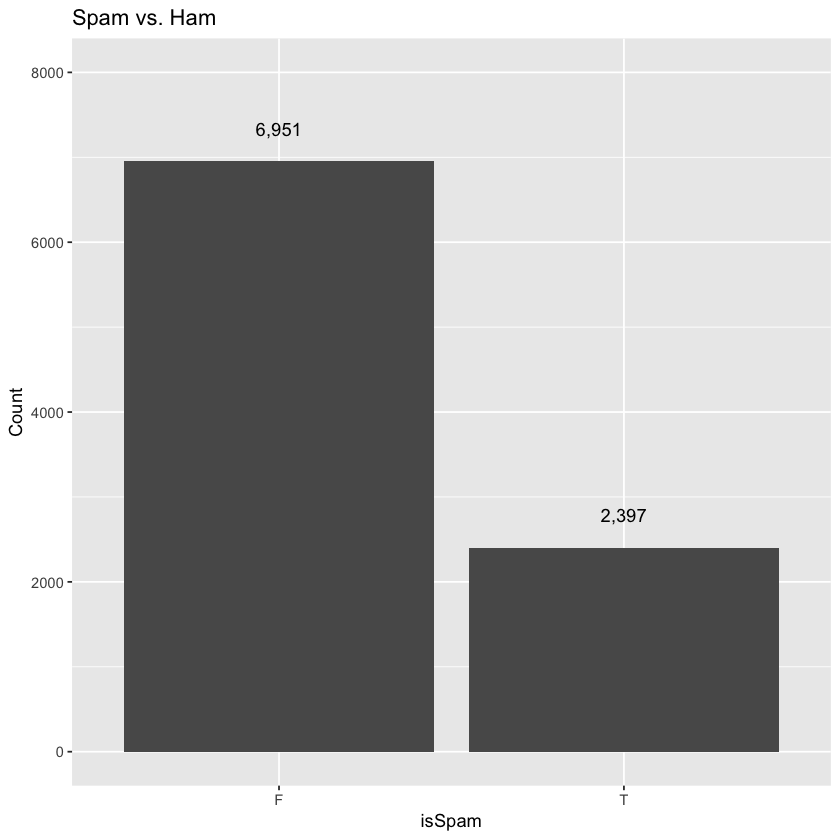

In [75]:
# Rather than discard about three percent of the dataset, 
# we assign 0 for both numeric and categorical predictor variables.

# get dataset balance, show via barchart
emailDFrp %>% 
  group_by(isSpam) %>% 
    dplyr::summarise(Count=n()) %>% 
      mutate(Pct = Count/sum(Count)) %>%
      ggplot(aes(x=isSpam, y=Count, label=comma(Count))) + 
      geom_bar(stat='identity') + 
      ggtitle("Spam vs. Ham") + 
      scale_y_continuous("Count", limits=c(0,8000)) + 
      scale_x_discrete("isSpam")  + 
      geom_text(vjust=-2)

Our dataset is unbalanced, with 2,397 (26%) spam emails, and 6,951 (74%) legitimate emails. This imbalance may lead to higher false negative rates in our modelling and analysis. However, this imbalance is not extreme, we will apply methods for oversampling. 
This also mean that an accuracy better than an accuracy of the all-negative (all zeros) 74% model is desired. 

## 2. Numerical Explanatory Variable Exploration

Using correlation matrix, we find that there are significant positive correlations between numerical predictor variables.

 <a href="#top">Back to top</a>

In [91]:
# correlation matrix 
AsVector <- emailDFrp[, c(2:30)]
nums <- sapply(AsVector, is.numeric)

In [93]:
# correlation matrix for numerical variables
cormat <- (round(cor(AsVector[, nums]), 2))
cormat[lower.tri(cormat, diag=TRUE)] <- NA
cormat <- reshape2::melt(cormat, na.rm = TRUE)
# head(cormat)

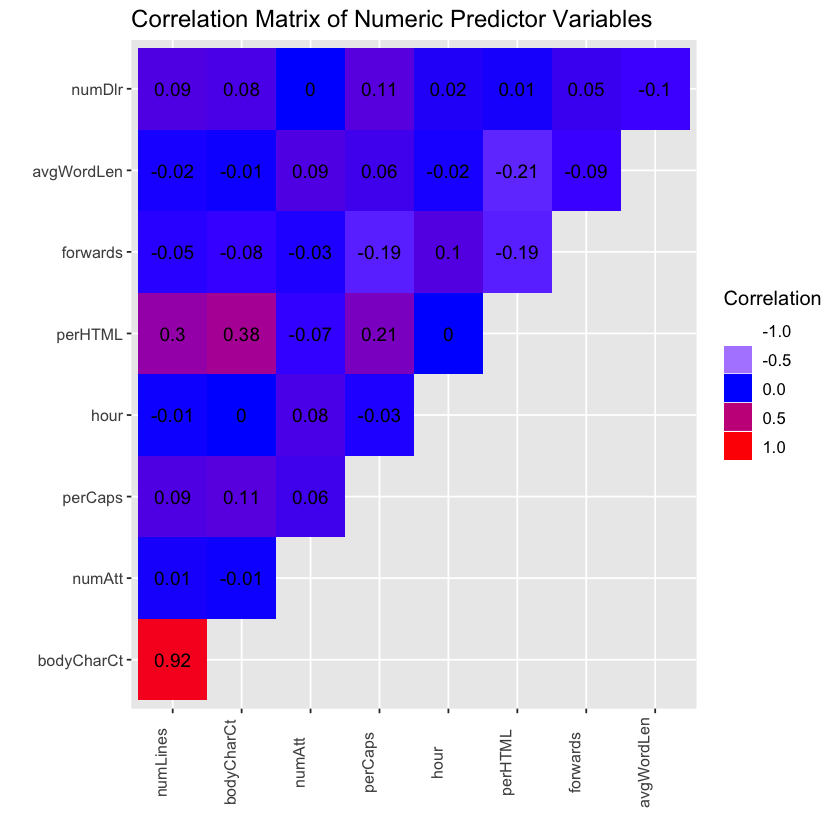

In [94]:
# plot correlation matrix [7]. 
# library(reshape2)
# library(ggplot2)
cormat %>% ggplot(aes(x=Var1, y=Var2, fill=value)) + 
           geom_tile() + 
           geom_text(aes(Var1, Var2, label = value), color = "black", size = 4)+ # text is in black
           theme(legend.position = "right", 
                 axis.text.x = element_text(angle=90, 
                                            vjust=-.5),
                 legend.text=element_text(size=10),
                 text=element_text(size=12)) + 
           scale_x_discrete("") + 
           scale_y_discrete("") + 
           ggtitle("Correlation Matrix of Numeric Predictor Variables")+
           scale_fill_gradient2(low = "white", high = "red", mid = "blue", 
           midpoint = 0, limit = c(-1,1), space = "Lab", 
           name="Pearson\nCorrelation") +
           guides(fill=guide_legend(title="Correlation"))
#      coord_fixed()

null device 
          1

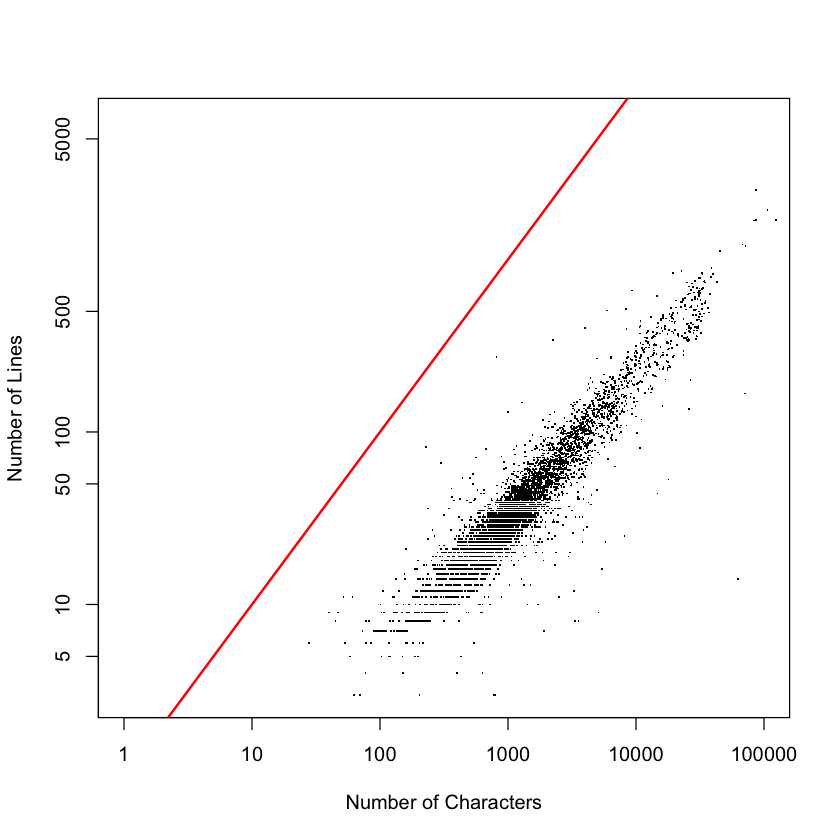

In [95]:
# relationship between bodyChartCt and numLines
#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()


Using correlation matrix, we find that there are significant positive correlations between numerical predictor variables.

The correlation matrix shows that numLines and bodyCharCt have a high positive relationship of 0.92 Pearson Correlation value. This is positive relation is expected since bodyChartCt and numLines, which represents the number of characters and the number of lines in the body, are very similar variables (as shown in the above plot). 

The high correlation, multicollinearity, of these 2 variables may cause these variables to be overweighted in our models. Generally, you want to remove one of a pair of attributes with an absolute correlation of 0.75 or higher. 
We also use splitting algorithm in rpart to select the most important variable for classification if similar variables are found.  


## 3. Categorical Explanatory Variable Exploration

We will use Fisher's exact test to explore the relationships between categorical variables. In our case, all categorical variables are dichotomous variables, or nominal variables, which have only two categories or levels of True or False. 

Fisher's test performs a test of independence for matrix input. The Fisher's exact p-value matrix shows the resulting p-values for categorical variables [10]. When p-value is smaller than alpha = 0.05, we REJECT the null hypothesis that the pairing variables are independent at the 0.05 level.

 <a href="#top">Back to top</a>

In [96]:
# fisher exact matrix for categorical varibles [10]
# get booleans
bools <- sapply(AsVector, is.factor)
bools_df <- AsVector[, bools]

# source combos of each var
combos <- combn(ncol(bools_df), 2)

# apply fishers to each combo and capture in df. Default alpha is .05 
fishers <- adply(combos, 2, function(x) {
  test <- fisher.test(bools_df[, x[1]], bools_df[, x[2]])

  out <- data.frame("Row" = colnames(bools_df)[x[1]]
                    , "Column" = colnames(bools_df[x[2]])
                    , "OddsRatio" = test$estimate
                    ,  "type"= test$alternative
                    ,  "p.value" = round(test$p.value, 2)
                    )
  return(out)

})  

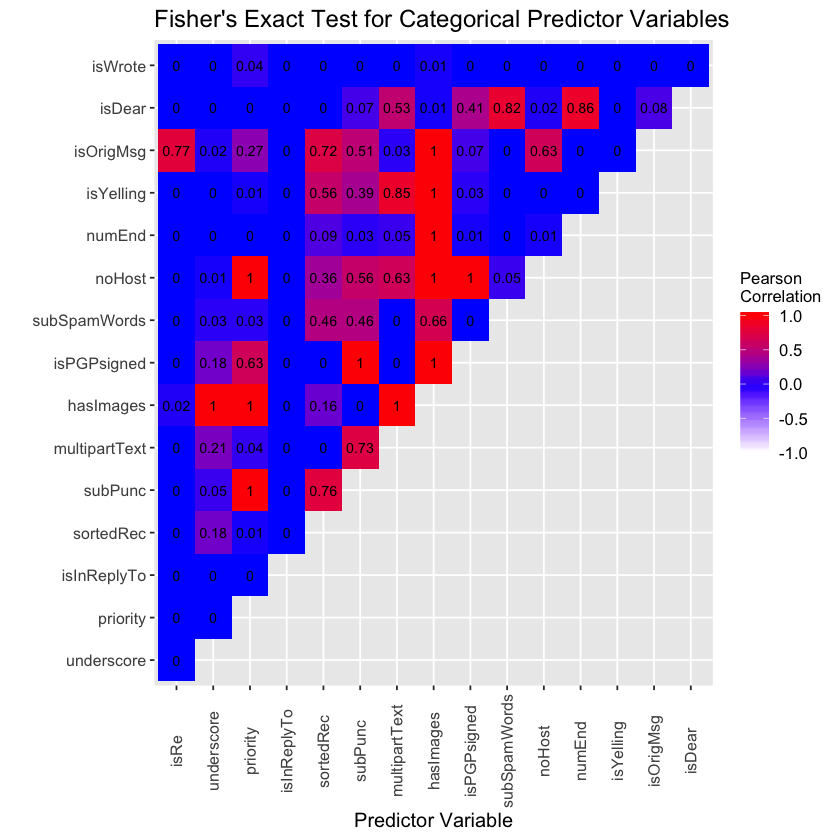

In [97]:
# plot fisher matrix [10]
fishers %>% 
  ggplot(aes(x=Row, y=Column, fill = p.value)) + 
  geom_tile() + 
  geom_text(aes(Row, Column, label = p.value), color = "black", size = 3)+
  theme(legend.position = "right", 
        legend.text=element_text(size=10),
        legend.title = element_text(size=10),
        axis.text.x = element_text(angle=90, vjust=0.5),
        text=element_text(size=12)) +
        scale_y_discrete("") + 
        scale_x_discrete("Predictor Variable") + 
        scale_fill_gradient2(low = "white", high = "red", mid = "blue", 
        midpoint = 0, limit = c(-1,1), space = "Lab", 
        name="Pearson\nCorrelation") +
        ggtitle("Fisher's Exact Test for Categorical Predictor Variables")

The above matrix shows that most of the pairs are not independent from one another (most of p-value are smaller than .05). When p-value is smaller than alpha = 0.05, we reject the null hypothesis that the pairing variables are independent at the 0.05 level.
This again is expected. Variable isWrote, if an email is electronically scribed, is clearly dependent since the majority of emails are electronically scribed, so the dependency of this variable is expected. Therefore, this variable is not very important for our classifying task. 
Other independence relationships such as the relationships between priority and noHost, between priority and subPunc, between priority and hasImage, between isYelling and hasImage, etc., indicate that these variables may be important for our analysis. 


## 4. Response Variable isSpam Exploration

Since our data set is imbalance, highly correlated predictor variables could affect our predicting model causing the model to predict more false negative. 
First, we inspect categorical variables with lowest Fisher's exact p-value (isRe, numEnd, subSpamWords, and isWrote) to determine their viability for predicting spam emails. 

 <a href="#top">Back to top</a>

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

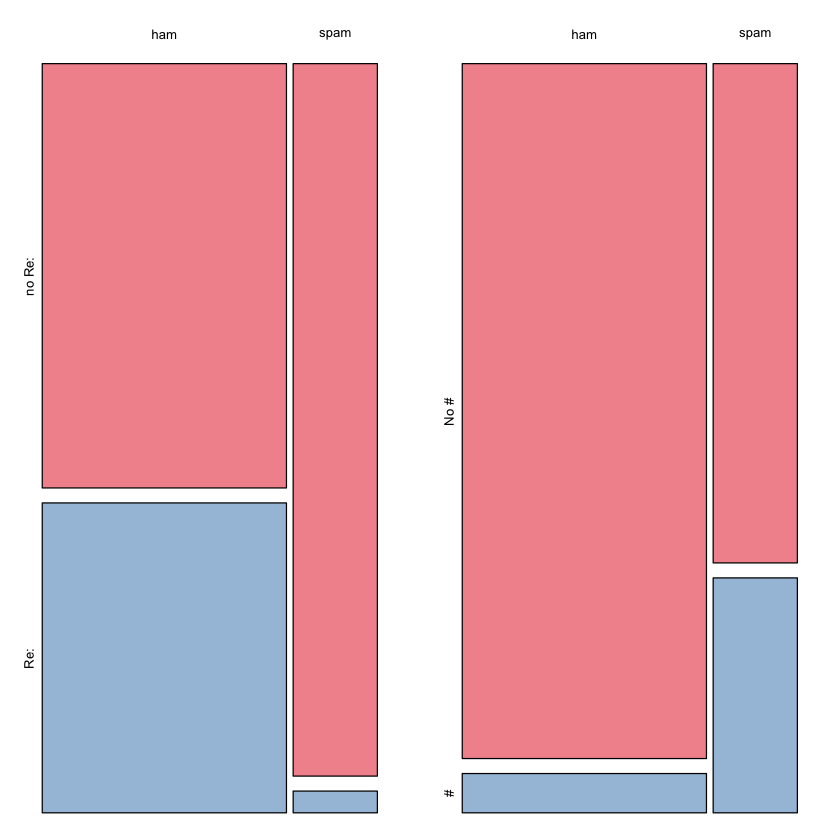

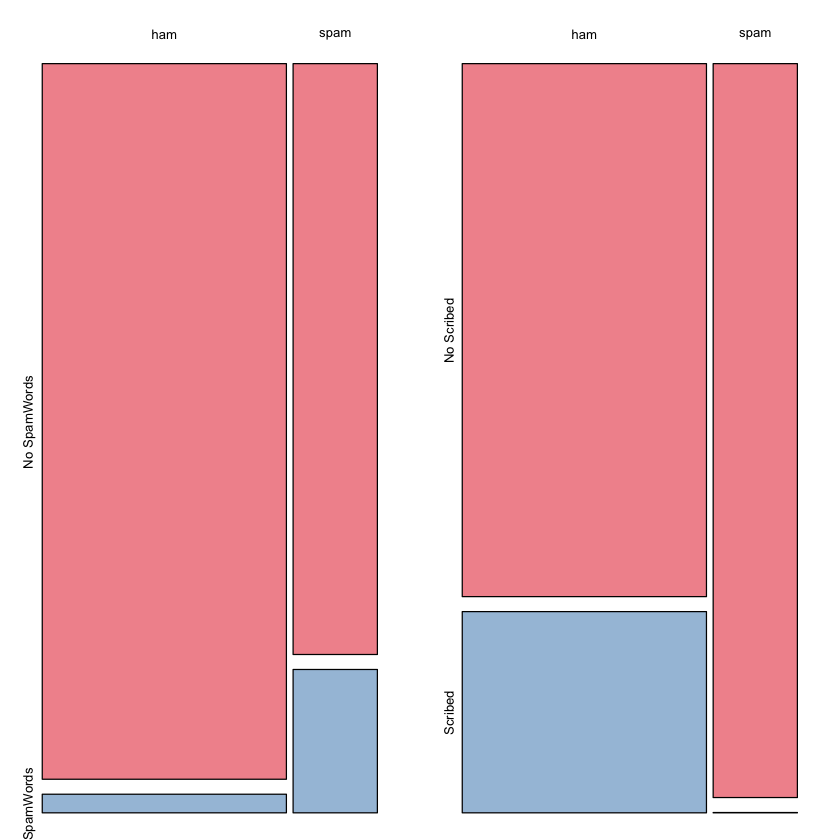

In [98]:
table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

# subSpamWords
fromSW = factor(emailDF$subSpamWords, labels = c("No SpamWords", "SpamWords"))
mosaicplot(table(isSpamLabs, fromSW), color = colM,
           main = "", xlab="", ylab = "")

# isWrote
fromisWrote = factor(emailDF$isWrote, labels = c("No Scribed", "Scribed"))
mosaicplot(table(isSpamLabs, fromisWrote), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

#dev.off()



subSpamWords is true when a known spam word appears in the subject. numEnd variable is also true when number is at the end of the email address. When subSpamWord and numEnd are true, the emails are set to spam emails. 
On the other hand, when isRe and isWrote are true, most of the emails are set to valid emails.
The true cases of subSpamWord and numEnd variables have more cases of spam than valid emails than when isRe and isWrote are true. Based on this observation, we can predict how the decision tree could split on different categorical variables in order to classify an email message as spam or valid.

We also inspect numeric variables's viability in predicting spam emails by looking at log values for numerics predictor vs. spam predicting with box plot. We will look at the box plots of highly independent variables	avgWordLen, forwards, hour as well as highly correlated variables numLines, bodyCharCt, perCaps, perHTML. 

 <a href="#top">Back to top</a>


In [99]:
# We can also identify separation of classes for numeric variables by looking at log values for numerics predictor in a box plot. We inspect a few interesting numeric predictors in Figure 6.
# get boxplots of key numeric predictors, split by outcome status valid or spam

nums <- which(lapply(emailDFrp, is.numeric) ==TRUE) 


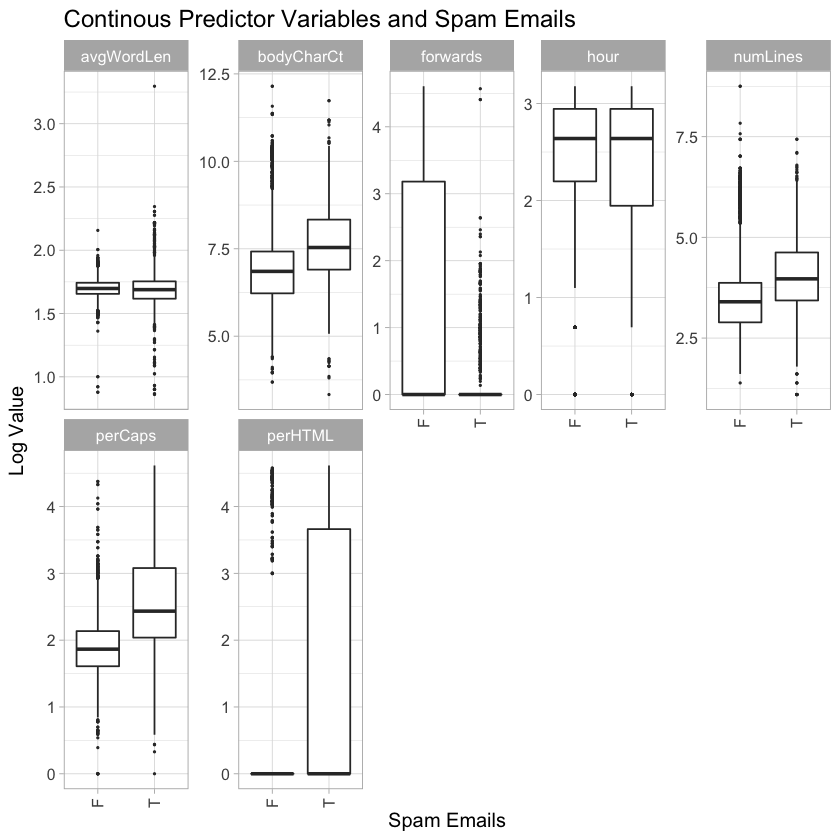

In [100]:
# aggregate and plot boxes
emailDFrp[,c(1, nums)] %>% 
  gather(Predictor, Value, 2:ncol(emailDFrp[,c(1, nums)])) %>% 
    filter(Predictor %in% c("forwards", "hour", "avgWordLen","perCaps", "perHTML", "numLines", 'bodyCharCt')) %>%
      ggplot(aes(x=isSpam, y=log(1+Value))) + 
      geom_boxplot(outlier.size=0.25, position="dodge") + 
      facet_wrap(~Predictor, scales = "free_y", ncol=5) + 
      theme_light() + 
      theme(legend.position = "bottom", 
            legend.text=element_text(size=8),
            legend.title = element_text(size=10),
            axis.text.x = element_text(angle=90, vjust=0.5),
            text=element_text(size=12))+
      ggtitle("Continous Predictor Variables and Spam Emails") + 
      scale_x_discrete("Spam Emails")+
      ylab("Log Value")

Variable forwards shows a concentrated distribution of valid emails while perHTML variable shows a concentrated distribution of spam emails. The majority of its third quartile occurs specifically with spam predictions.
Vaiables forwards and perHTML are good classification variables. 

The boxplots show that the median values of perCaps, numLines,bodyChartCt for spam emails is higher than their median values for valid emails. We can see that some of the lower correlation variables are involved in the decision of spam classification. 


<a id="SEL"></a>

# Feature Importance and Variable Selection

Feature weight is a weighted sum of improvement in impurity for each variable split. 
In this session, we explore which variables our model are considered the most important for classification.

We fit an Naive Bayes, rpart CART, Random Forest, xgboost, and radial SVM models, on the training data using all 29 features with the same 2/1 split. 

The package provides us with a listing of the variables it considers the most important for splitting. We can easily identify these variables with the variable importance method varImp() contained in rpart and mlbench libraries.  

 <a href="#top">Back to top</a>

In [119]:
set.seed(4)
library(mlbench)
# library(caret)

## 1. Feature important with rpart model

rpart variable importance

  only 20 most important variables shown (out of 29)

              Overall
perHTML       1245.79
forwards      1199.35
isInReplyTo   1126.74
perCaps       1114.94
isRe           954.44
numLines       885.48
subBlanks      705.52
bodyCharCt     661.84
subSpamWords   495.13
numEnd         470.34
numDlr         407.78
subExcCt       323.80
avgWordLen     267.37
multipartText  228.40
isDear         197.33
numRec         154.57
isYelling      135.30
hour            84.56
isWrote         84.26
numAtt          70.96


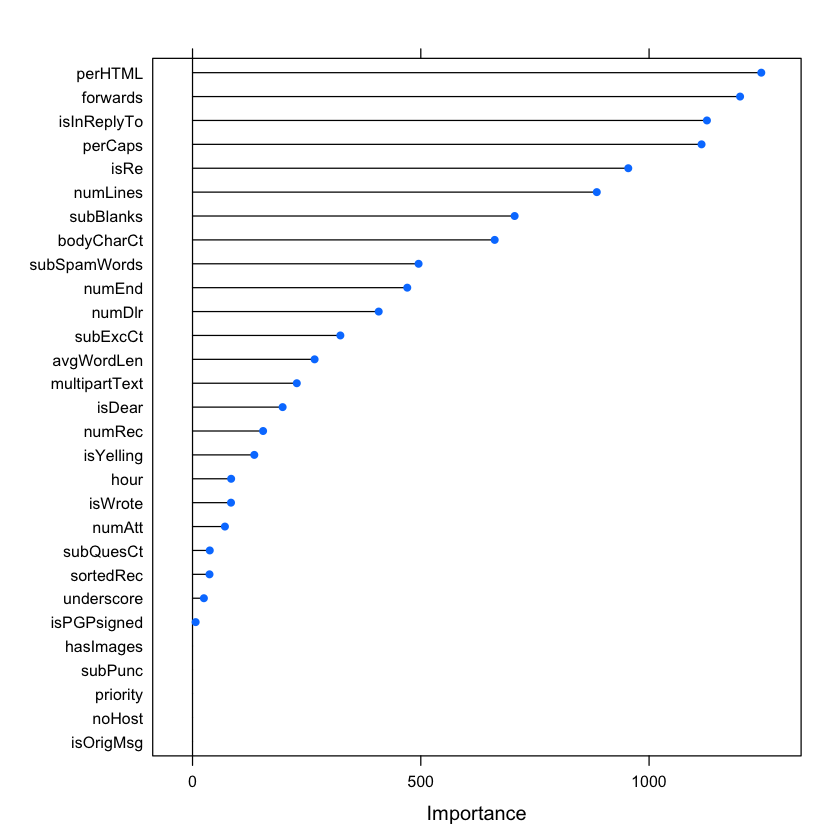

In [334]:
#Feature important with rpart model
importance <- varImp(model_rpart, scale=FALSE)
# summarize importance
print(importance)
plot(importance)

perHTML is the heaviest variable in rpart model, following very closely after it are forwards, IsInReplyTo, and perCaps.

## 2. Feature important with Naive Bayes

loess r-squared variable importance

  only 20 most important variables shown (out of 29)

               Overall
perCaps       0.273794
isInReplyTo   0.146858
perHTML       0.139834
isRe          0.134650
numEnd        0.126527
forwards      0.104876
avgWordLen    0.093348
isWrote       0.087958
subSpamWords  0.085826
subBlanks     0.061576
subExcCt      0.059301
isYelling     0.055044
underscore    0.036310
numRec        0.032399
multipartText 0.027211
isDear        0.024400
subPunc       0.015478
isOrigMsg     0.013514
priority      0.012914
noHost        0.009024


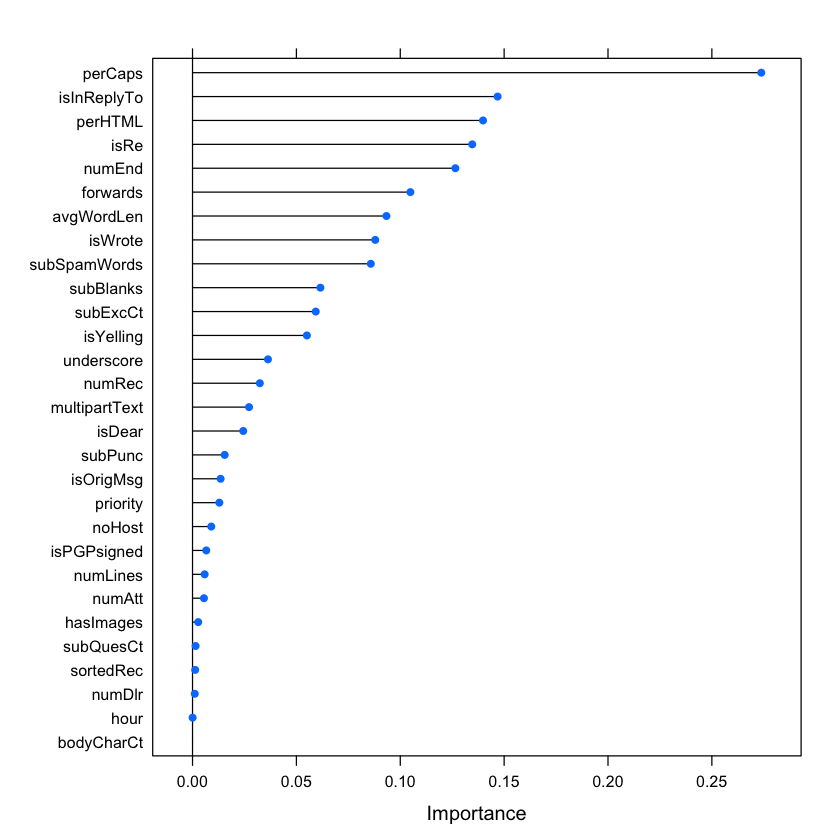

In [335]:
#Feature important with Naive Bayes
importance <- varImp(model_nb, scale=FALSE)
# summarize importance
print(importance)
plot(importance)

perCaps is the obvious heaviest variable in Naiyes Bayes model, following from a far distant are IsInReplyTo, perHTML, IsRe and numEnd. 

## 3. Feature important with Random Forest

rf variable importance

  only 20 most important variables shown (out of 29)

              Overall
perCaps        641.19
perHTML        365.08
bodyCharCt     338.26
numLines       287.06
forwards       248.29
subBlanks      227.01
numEnd         159.37
avgWordLen     152.54
subExcCt       139.53
isInReplyTo    139.03
numDlr         127.47
isRe            98.58
hour            88.85
subSpamWords    80.60
numRec          73.97
isDear          68.21
isYelling       59.20
multipartText   55.63
numAtt          41.79
underscore      28.73


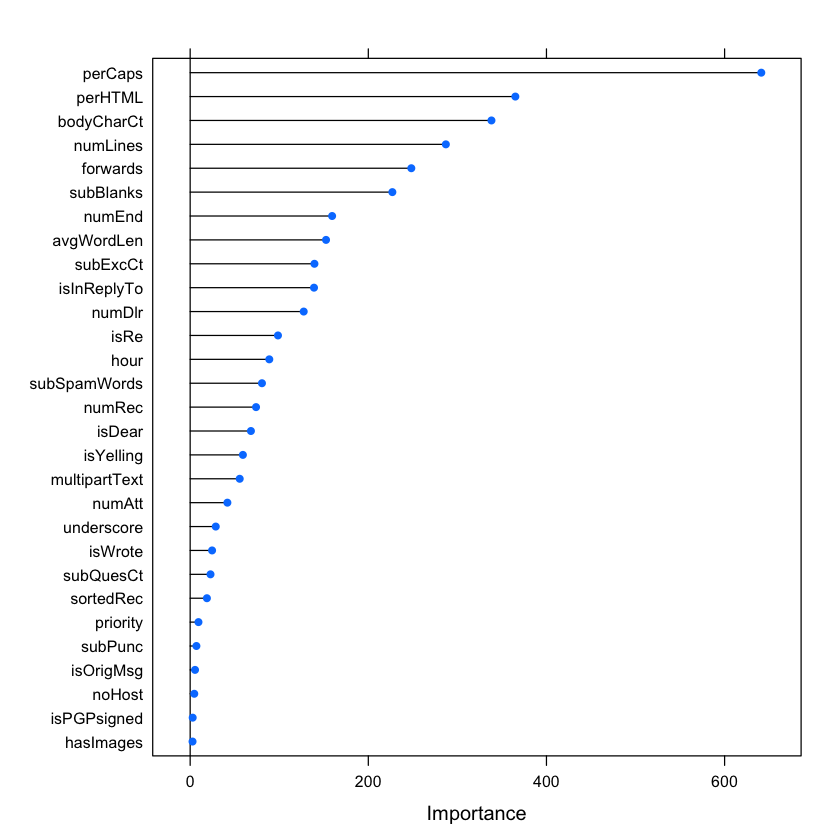

In [336]:
#Feature important with Random Forest
importance <- varImp(model_rf, scale=FALSE)
# summarize importance
print(importance)
plot(importance)

perCaps is again the obvious heaviest variable in Random Forest model, following from a far distant are perHTML, bodyCharCt, and numLines. 

## 4. Feature important with Radial SVM in caret library

loess r-squared variable importance

  only 20 most important variables shown (out of 29)

               Overall
perCaps       0.273794
isInReplyTo   0.146858
perHTML       0.139834
isRe          0.134650
numEnd        0.126527
forwards      0.104876
avgWordLen    0.093348
isWrote       0.087958
subSpamWords  0.085826
subBlanks     0.061576
subExcCt      0.059301
isYelling     0.055044
underscore    0.036310
numRec        0.032399
multipartText 0.027211
isDear        0.024400
subPunc       0.015478
isOrigMsg     0.013514
priority      0.012914
noHost        0.009024


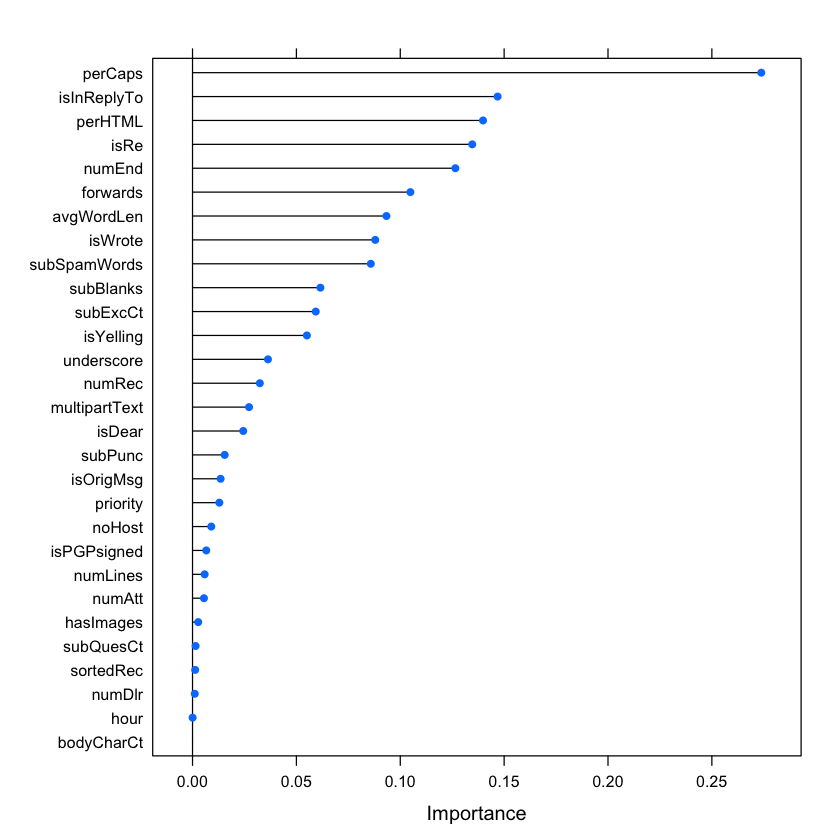

In [338]:
#Feature important with Random Forest
importance <- varImp(model_svm_rl, scale=FALSE)
# summarize importance
print(importance)
plot(importance)

perCaps is again the obvious heaviest variable in this SVM model, following from a far distant are IsReplyTo, perHTML, and isRe.

## Feature Importance Summary: 

perCaps, or the percentage of capital alpha characters in the body, is the most important variable in classification in Radial SVM, Random Forest, and Naive Bayes models. perHTML is the heaviest variable in rpart model. 
In all three models, variables perCaps, perHTML, bodyCharCt, forwards, numEnds, are the most predictive variables. 

The perCaps variable outweighs other variables in Random Forest, Naive Bayes, and Radial SVM. Meaning perCaps is a good classification vaiable of spam and valid email for these models. 


 <a href="#top">Back to top</a>

## Heavy Weight perCaps Variable Exploration

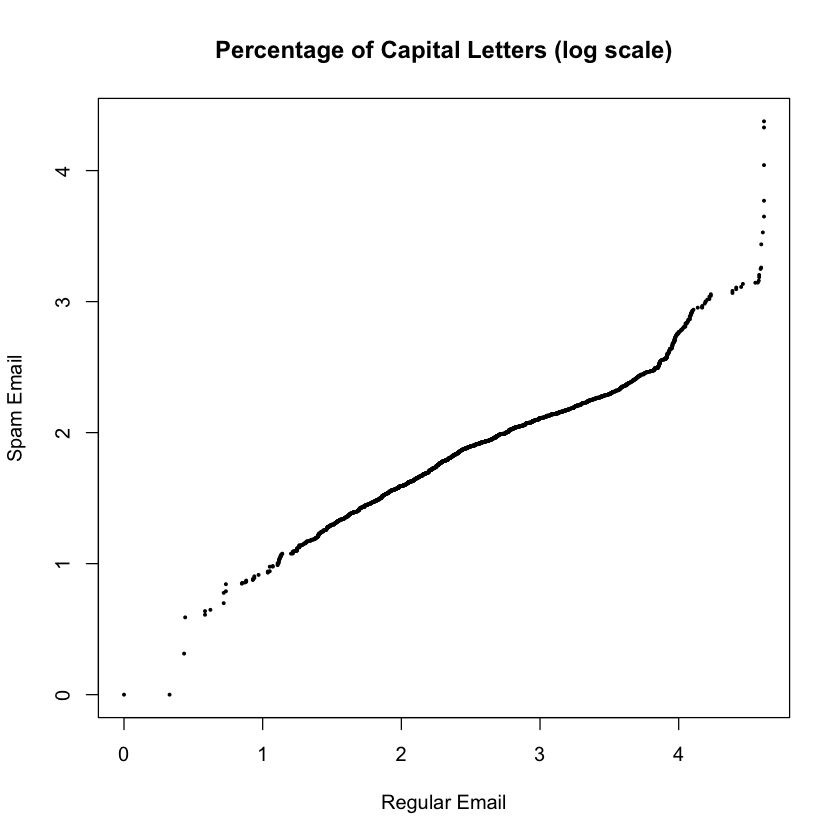

In [136]:
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

At the top of the variable importance list is perCaps, or the percentage of capital alpha characters in the body. We saw good separation of spam and valid email for this variable. The above log scale of perCaps plot shows that perCaps has a obvious positive linear relationship in regular email and in spam email, where the spam has more perCaps.  

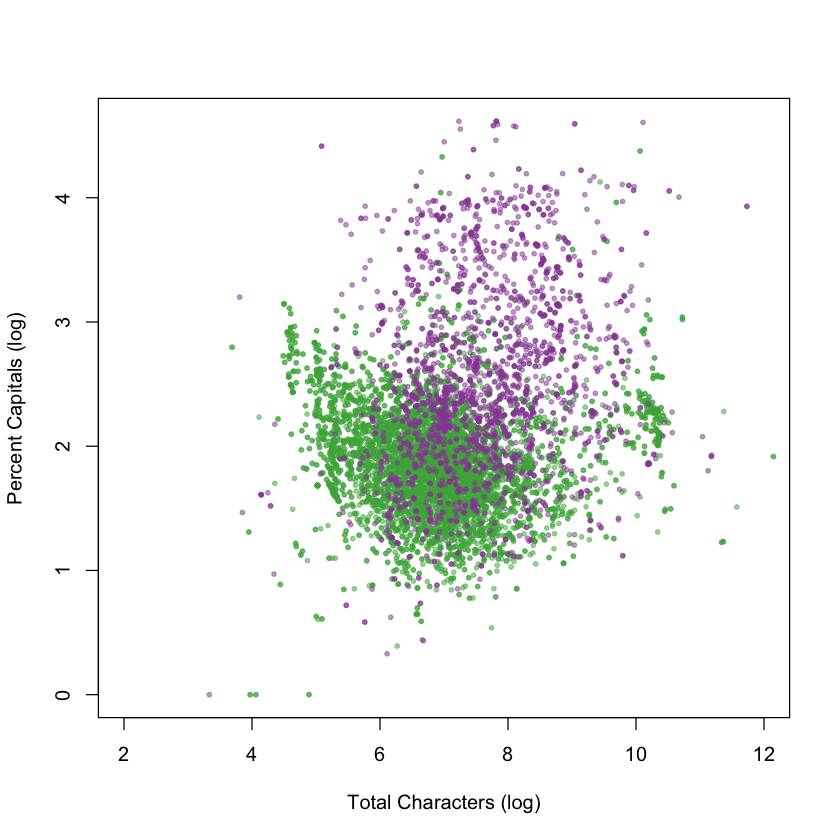

In [137]:
#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

#dev.off()

perCaps and BodyCharCt do not show any obvious linear relationship.

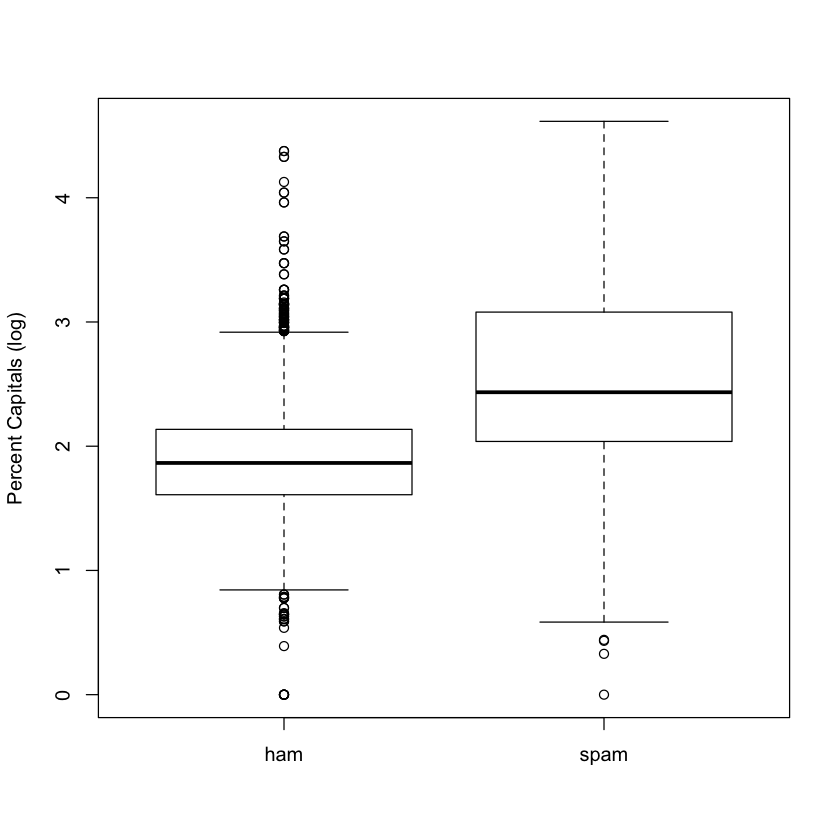

In [140]:
#box plot
#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

#dev.off()


The predictor variable perCaps shows a larger interquartile range for spam. We also know from the boxplot that the median perCaps value for spam messages is higher than for valid messages. Also, roughly 75 percent of valid messages have a perCaps value lower than the median perCaps value for spam messages. 
Examination of this predictor variables gives some idea of how we should expect rpart to determine splits. However, we can also expect that some of the lower correlation variables might be involved in the decision of spam versus valid, perhaps providing some finer detailed distinctions between the two classes. In the next session, when we use rpart in to determine which variables are the most important for splitting, we expect to see perCaps at the top of the tree. 

Using full listing of 29 explanatory variables in our email dataset can lead to over-fitting; however, decision trees allow us to find the best variables for splitting while pruning extraneous variable splits. This reduction in the number of explanatory variables can help with model efficiency.


<a href="#top">Back to top</a>

## Log Likelihood Ratio for Randomly Chosen Test Messages

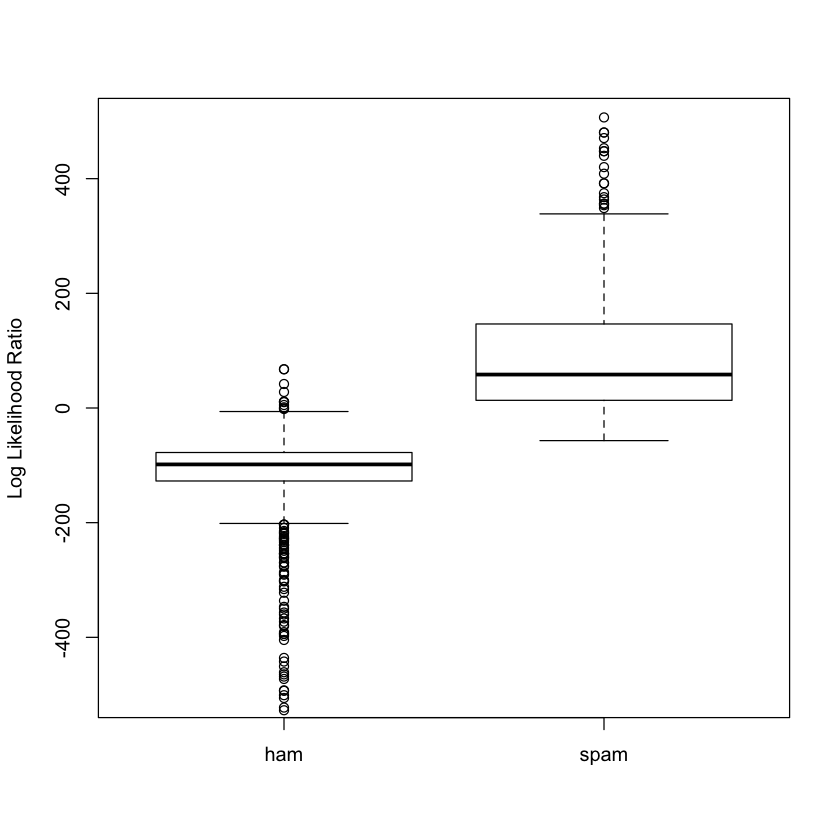

In [131]:
#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
#dev.off()


The above plot shows a more concentrated distribution of values in the third quartile for spam email and a larger interquartile range for valid emails. We also know from the boxplot that the median log likelihood ratio value for spam messages is higher than for valid messages. Also, more than 75 percent of valid messages have a log likelihood ratio value lower than the median log likelihood ratio for spam email. 


In [141]:
typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

[1] 0.007194245

[1] 0.01151079

In [142]:
typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

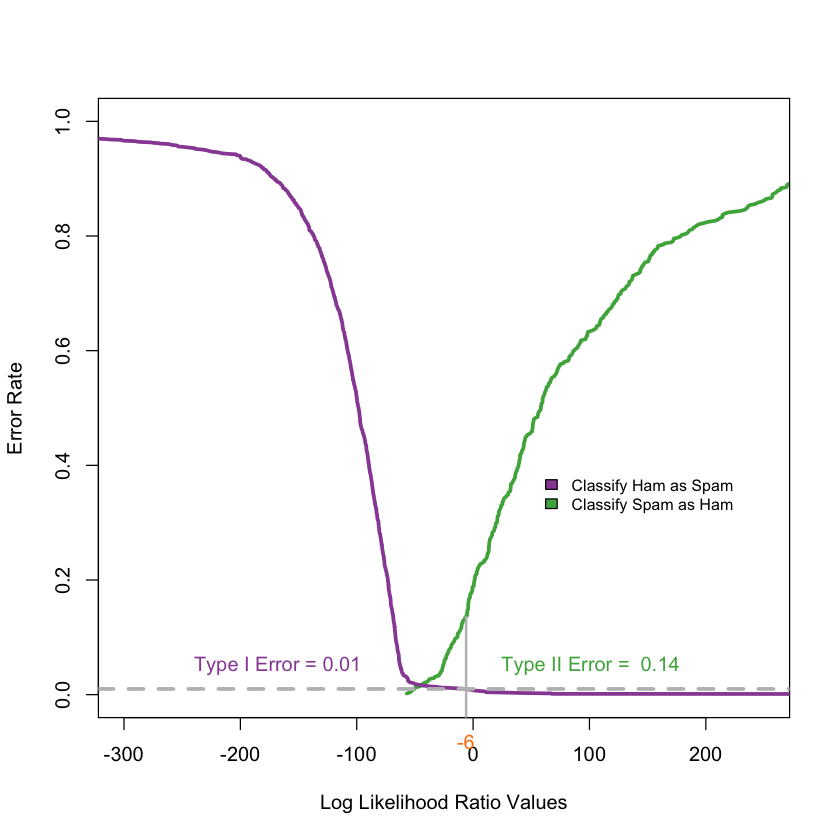

In [134]:
#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

#dev.off()

Type I error is the rejection of a true null hypothesis (also known as a "false positive" finding), while a type II error is failing to reject a false null hypothesis (also known as a "false negative" finding). Since we consider FP to be more costly, Type I error is more important in this case study of filtering spam emails. In this test, Type I error is smaller with rate of 0.0072 versus Type II error rate of 0.012. 


<a id="MODEL1"></a>

# Baseline Model - Default rpart

The rpart package contains other control parameters used primarily for exploratory purposes. 
Let's start by performing 5 fold cross validation and using all 29 raw features in this classifier. 
We are going to split 2/1. Since the number of unique emails, 9348, are not very large, to reduce the rounding error, we leave the test set larger with the 2/1 split.

<a href="#top">Back to top</a>

In [251]:
# this block is also in the appendix. Not to execute this block in both places
# set.seed(418910)
# testSpamIdx = sample(numSpam, size = floor(numSpam/3)) 
# testHamIdx = sample(numHam, size = floor(numHam/3))

# testDF = 
#   rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
#          emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
# trainDF =
#   rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
#          emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

# rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")


F    T 
2192  125

[1] 0.05394907

F   T 
125 674

[1] 0.1564456

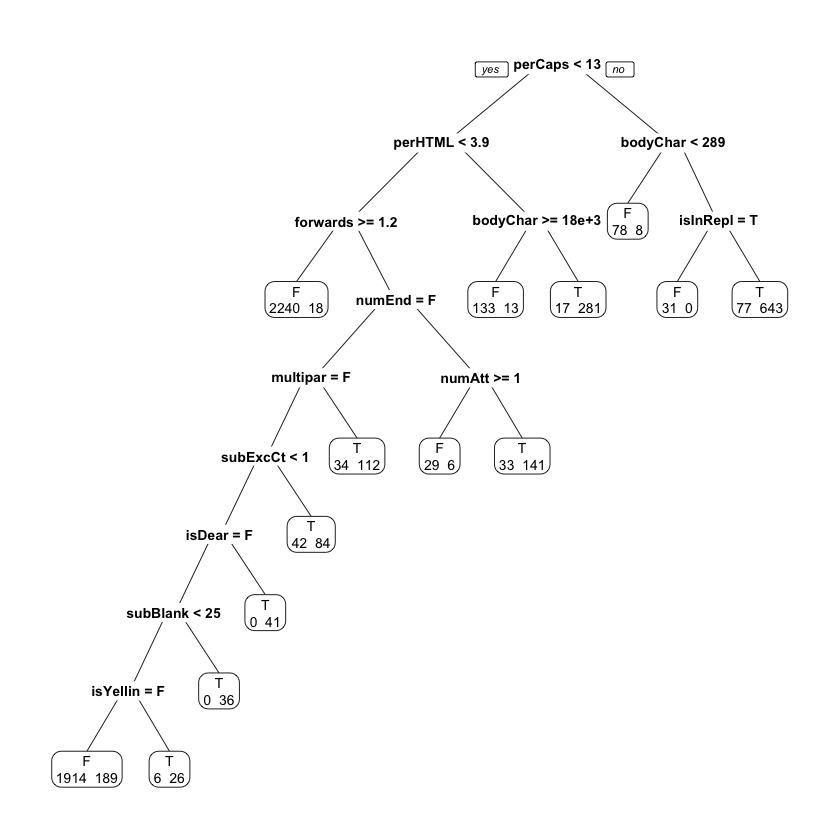

In [310]:
library(rpart.plot)
#pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

prp(rpartFit, extra = 1)
#dev.off()

predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
summary(predsForSpam)

sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

In [372]:
# confusion matrix 
cm <- table(actual = testDF$isSpam, fitted = predictions)
cm 
# mean misclassification error
mmce <- 1 - (sum(diag(cm))/sum(cm))
mmce

      fitted
actual    F    T
     F 2192  125
     T  125  674

[1] 0.08023107

In [366]:
precision <- diag(cm) / colSums(cm)
recall <- diag(cm) / rowSums(cm)
f1 <-  ifelse(precision + recall == 0, 0, 2 * precision * recall / (precision + recall))

print(f1)

        F         T 
0.9460509 0.8435544 


The tree has splits that lead to terminal nodes. Each split is basically an if or then statement. 
As shown in the above, we are able to classify 77 percent of all spam messages based on a split value of 13 percent for perCaps. In this case, the rpart model predicts non-spam when a message contains less than 13 percent capitals. From this tree, we can also see numEnd and priority give little value for spam classification. 

Another note is the usage of bodyCharCt. It is used twice in the splitting process for the training data. 

Additionally, we can see quite a bit of misclassification in the model on the training set, particularly a prevalence of false negatives.We utilize the test data set of emails to produce a confusion matrix and determine model generalization performance.

<br/>
<center> Confusion Matrix for Default rpart Model</center>

||Predicted Valid:0| Predicted Spam:1
| :------ |-------: | -------:|
|Actual Valid: 0 - negative| 2192 | 125           
|Actual Spam: 1 - positive| 125| 674

<br/>
<center> Performance Report for Default rpart Model</center>

|F1|AUC|False Positive Rate |False Negative Rate|mean misclassification error (mmce)|
| :------ | :------ |-------: | -------:|-------:|:---------
|0.9460509|0.92|0.054 | 0.156|0.080||


As seen in the confusion matrix, rpart give better F1 of 95%, AUC of 92% compared to the dummy all negative model (all zeros) of 75%. However, the default rpart model struggles with false negatives. In total, 125 observations in the test set out of 799 spam records are misclassified for a false negative rate of 15.6 percent. MMCE overall is high at 8.02%.
We attempt to improve on these metrics by optimizing rpart’s hyperparameters, random forest parameters, SVM different kernels, and xgboost in the next session.


<a href="#top">Back to top</a>

In [312]:
fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })

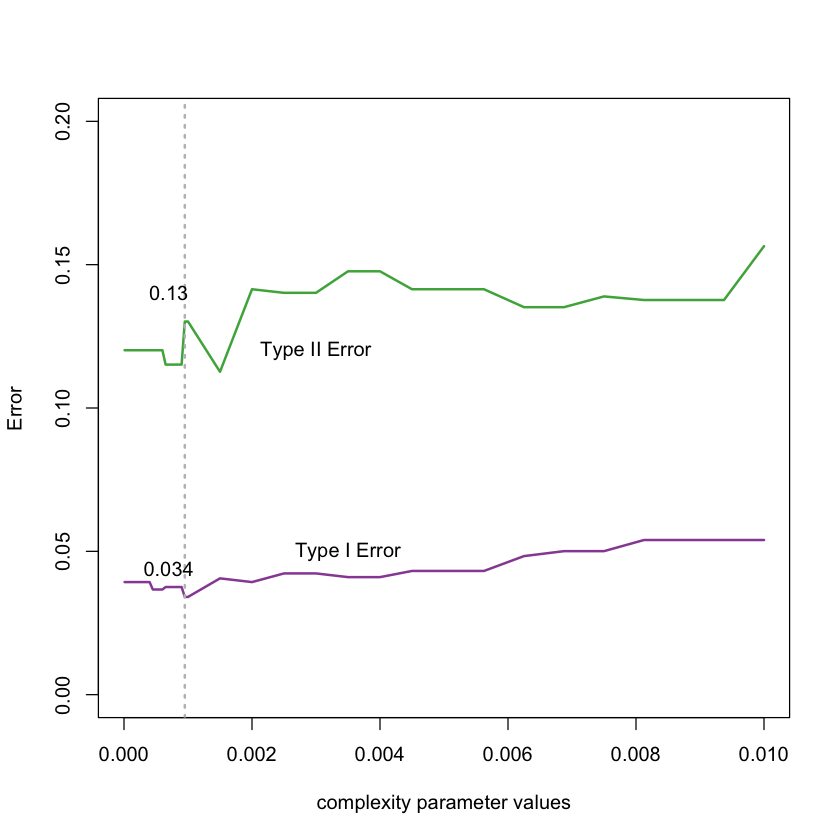

In [313]:
#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

#dev.off()

We represent values on a log scale in order to provide a clean visualization of classification regions. The observations under the Type I Error curve and under Type II Error curve are those misclassified and the color boundaries represent the outcomes spam and valid. Our base model struggles with Type II error false negative rate. This indicates our model needs more complexity. From the above plot, Type II error is at the lowest with complexity around .0015, the bound area of Type I and Type II error is smallest where complexity is around .008 - 0.010


# Model Optimization

Optimization of parameters is achieved by exploring a discrete list of the parameters of interest. The grid search method is used in conjunction with 3-fold stratified cross-validation. Grid Search CV to find the best parameters for Naive Bayes method, CART, SVM, Random Forest, and xgboost. 

We seek to maximize the true positive classification rate where "spam" is our positive class. We do this by selecting best F1 as our performance metric when tuning all the parameters. A false positive means an important email may get lost in spam folder or even deleted. A false negative means the user may experience unfiltered email that should be in the spam folder. We consider the former a more severe model error. The mean AUCs for all models and associated parameters are also compared and the model with the highest cross-validated F1 is chosen as our optimized model. If all else are equal, AUC, Recall, Precision, Type II and Type I error, and mean misclassification error will be used for ranking.  

The above baseline rpart model is then subsequently compared to the optimized model given the test data set. We explore model performance and comparisons in the next section. 

<a href="#top">Back to top</a>

<a id="MODEL2"></a>

## Naive Bayes method [15] 

Naive Bayes is historically the choice for classifying emails.
It is linear classifier where this type of “classifier” assigns a probability that a new sample is in one class or another (spam or ham), meaning from the words in the message and the words not in the message, compute the probability of spam or ham. It is based on Bayes rule, fequency analysis of occurances of words and an independence assumption (the naive part).

Compute probabilities from training data

    Given a word W,

    P(spam|W)=P(W|spam)×P(spam)P(W)

    For words W1, W2 and ¬W3, e.g.,

    P(spam|W1∩W2∩¬W3)=

    P(W1∩W2∩¬W3|spam)×P(spam)P(W1∩W2∩¬W3)

Training the probabilities

    Probabilities on right hand side of the equation are calculated in training data;
    Estimated probability on the left hand side assigned to new messages and used to classify;
    Some test data is set aside to check the accuracy of the classification.

The NaiveBayes function

    We'll use a Naive Bayes classifier provided in the package e1071.

Create a Naive Bayes classifier object

    We'll do this on the training data.

Evaluate the performance on the test data

        Given a model or classifier object there is usually a predict function to test the model on new data.
        Following predicts the classifications of messages in the test set based on the probabilities generated with the training set.

Check the predictions against reality

    We have predictions and we have a factor of real spam-ham classifications. 
    


  <a href="#top">Back to top</a>

### Naive Bayes Method - Grid Search 

In [316]:
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

library(naivebayes)
library(e1071)
nb_grid<-expand.grid(laplace=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
train_control<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb
# 0.0      FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.110056107 does the best

time = proc.time() - ptm
time

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Naive Bayes 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7479, 7477, 7479, 7478, 7479 
Resampling results across tuning parameters:

  laplace  usekernel  adjust  F1         prec       rec        Type_I_err 
  0.0      FALSE      FALSE   0.9253762  0.9365138  0.9146874  0.085312569
  0.0      FALSE       TRUE   0.9253762  0.9365138  0.9146874  0.085312569
  0.0       TRUE      FALSE   0.8970349  0.8143423  0.9987051  0.001294861
  0.0       TRUE       TRUE   0.8970349  0.8143423  0.9987051  0.001294861
  0.1      FALSE      FALSE   0.9253762  0.9365138  0.9146874  0.085312569
  0.1      FALSE       TRUE   0.9253762  0.9365138  0.9146874  0.085312569
  0.1       TRUE      FALSE   0.8970349  0.8143423  0.9987051  0.001294861
  0.1       TRUE       TRUE   0.8970349  0.8143423  0.9987051  0.001294861
  0.3      FALSE      FALSE   0.9253762  0.9365138  0.9146874  0.085312569
  0.3      FALSE       TRU

   user  system elapsed 
 20.608   1.180  22.079 

Grid Search reveals: 

With F1 as the selective metric, the optimal model using the largest value F1 is: 

    laplace = 0 
    usekernel = FALSE
    and adjust = FALSE.

Optimal model result:

|laplace|  usekernel|  adjust|  F1         |prec       |rec        |Type_I_err     |Type_II_err
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:
 |0.0  |    FALSE  |    FALSE  | 0.9253762 | 0.9365138 | 0.9146874 | 0.085312569  |  0.1802296 |
 

<a href="#top">Back to top</a>

### Naive Bayes method - Optimized Model 

The optimized variables:  

    laplace = 0 
    usekernel = FALSE
    andadjust = FALSE.

In [314]:
# Naive Bayes with optimal model variables, 5-fold 
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

library(naivebayes)
library(e1071)
nb_grid<-expand.grid(laplace=c(0), usekernel=c(F), adjust=c(F))
train_control<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb

time = proc.time() - ptm
time

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Naive Bayes 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results:

  F1         prec      rec        Type_I_err  Type_II_err
  0.9217033  0.935805  0.9082146  0.09178535  0.1810597  

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'usekernel' was held constant at a value of FALSE
Tuning
 parameter 'adjust' was held constant at a value of FALSE

   user  system elapsed 
  1.519   0.059   1.596 

The optimal result for Naive Bayes is: 

  
  |laplace|  usekernel|  adjust|  F1         |prec       |rec        |Type_I_err     |Type_II_err
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:
 |0.0  |    FALSE  |    FALSE  | 0.9217033  |0.935805 | 0.9082146 | 0.09178535  |0.1810597  |
 
 
 
This is a fast method with fast traing and executing time (in s) as following: 

 |user  |system |elapsed |
 | :------ |-------: | -------:|
 | 1.519  | 0.059  | 1.596 |
  
  
 
Spam filter performance

    It correctly classified > 90% of the spam;
    It correctly classifies > 93% of the ham;
    This is good balance.


<a id="MODEL3"></a>

## CART method

Optimized Model Results

As stated previously, we explore the complexity parameter, minimum split for each node, maximum depth of the tree, and the splitting criterion via a grid search. The parameter list is given in Table 4 below:

Parameter Search Criteria complexity parameter (cp) -0.001, 0.01, 0.1, 0.2, 0.5.

- Complexity Parameter (cp) - A scaled complexity penalty that ranges from 0 to 1. cp is compared against the error rate relative to a previous split. Splits that do not decrease the lack of fit by cp is not considered. Default Value = 0.01
- Minsplit - The minimum number of observations that must exist in a node in order for a split to be attempted. Default Value = 20
- Maxdepth - The maximum depth of any node of the final tree, with the root node counted as depth 0. Default Value = 30
- Splitting Criterion (Gini) - Gini utilizes the Gini index to optimize split points, information uses entropy and information gain. Default Value = Gini

To validate the model cp is used.‘cp’ stands for Complexity Parameter of the tree. The value of cp should be least, so that the cross-validated error rate is minimum.

<a href="#top">Back to top</a>

### CART Method - Grid Search

In [145]:
# 5 folds is the standard. 3 folds is ok. 10 folds is overkilled 
ptm <- proc.time() 

val<-seq(from = 0, to=0.01, by=0.0005)
library(rpart)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1) 
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

# 0.0010  0.9607852  0.9575735  0.9640339  0.03596605  0.1239022   does the best! and better than naivebayes

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7479, 7479, 7478, 7477, 7479 
Resampling results across tuning parameters:

  cp      F1         prec       rec        Type_I_err  Type_II_err
  0.0000  0.9577478  0.9553827  0.9601497  0.03985032  0.1301670  
  0.0005  0.9591898  0.9548411  0.9636016  0.03639843  0.1322521  
  0.0010  0.9598153  0.9557787  0.9638897  0.03611035  0.1293302  
  0.0015  0.9586294  0.9554352  0.9618756  0.03812443  0.1301557  
  0.0020  0.9580722  0.9580461  0.9581347  0.04186533  0.1218119  
  0.0025  0.9570144  0.9563400  0.9577036  0.04229637  0.1268206  
  0.0030  0.9562726  0.9545782  0.9579914  0.04200860  0.1322460  
  0.0035  0.9555018  0.9548986  0.9561211  0.04387889  0.1309943  
  0.0040  0.9541411  0.9534860  0.9548261  0.04517386  0.1351635  
  0.0045  0.9524542  0.9511289  0.9538193  0.04618074  0.1422573  
  0.0050  0.9508230  0.9517123  0.9500783  0.0

   user  system elapsed 
  4.011   0.297   4.444 

Grid Search reveals: 

With F1 as the selective metric, the optimal model using the largest value F1 is: 

    cp = 0.001

Optimal model Result:

|cp      |F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:
|0.0010  |0.9598153  |0.9557787  |0.9638897  |0.03611035  |0.1293302 | 

<a href="#top">Back to top</a>

### CART Method - Optimized Model 

The optimized variable cp = 0.001. 

In [317]:
ptm <- proc.time() 

library(rpart)
cart_grid<-expand.grid(cp=0.001)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1) 
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

# executing time
time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7478, 7478, 7479, 7479 
Resampling results:

  F1         prec       rec        Type_I_err  Type_II_err
  0.9605387  0.9546076  0.9666249  0.03337509  0.1334916  

Tuning parameter 'cp' was held constant at a value of 0.001

   user  system elapsed 
  2.449   0.146   2.633 

The optimal result for CART when tuning parameter 'cp' was held constant at a value of 0.001

|F1         |prec       |rec        |Type_I_err  |Type_II_err
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:
  |0.9605387  |0.9546076  |0.9666249  |0.03337509  |0.1334916  

This is a fast method with fast traing and executing time (in s) as following: 

   |user  |system |elapsed 
   | :------ |-------: | -------:|
  |2.449   |0.146  | 2.633 
  
  
<a href="#top">Back to top</a>


[**more intepretation here**] 



<a id="MODEL4"></a>

## Random Forest method


  <a href="#top">Back to top</a>

### Random Forest method - Grid Search

In [318]:
ptm <- proc.time() 

# random Forest takes longer. the square_root of (29) is the max of fold.
library(randomForest)
rf_grid<-expand.grid(mtry=seq(from =1, to = 25, by = 2))
train_control<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf
# original result is mtry = 9
# best mtry is 7 or 9 

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Random Forest 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7479, 7478, 7477, 7479, 7479 
Resampling results across tuning parameters:

  mtry  F1         prec       rec        Type_I_err   Type_II_err
   1    0.9144373  0.8454012  0.9958283  0.004171731  0.52857168 
   3    0.9781737  0.9700116  0.9864767  0.013523318  0.08844381 
   5    0.9846905  0.9792324  0.9902169  0.009783138  0.06091162 
   7    0.9860924  0.9827137  0.9894975  0.010502459  0.05048278 
   9    0.9857952  0.9831191  0.9884906  0.011509447  0.04923017 
  11    0.9856539  0.9829802  0.9883469  0.011653125  0.04964944 
  13    0.9858671  0.9832611  0.9884906  0.011509447  0.04881263 
  15    0.9849301  0.9825399  0.9873395  0.012660526  0.05090118 
  17    0.9852217  0.9825450  0.9879151  0.012084883  0.05089857 
  19    0.9852995  0.9822726  0.9883467  0.011653332  0.05173539 
  21    0.9848601  0.9823957  0.9873397  0.01266

   user  system elapsed 
367.953   8.824 384.493 

Grid Search reveals: 

With F1 as the selective metric, the optimal model using the largest value F1 is: 

      mtry = 7

Optimal model Result:

|mtry      |F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:
|7    |0.9860924  |0.9827137 |0.9894975 | 0.010502459  |0.05048278


<a href="#top">Back to top</a>

### Random Forest method - Optimized Model

In [319]:
tm <- proc.time() 

# random Forest takes longer. the square_root of (29) is the max of fold.
library(randomForest)
rf_grid<-expand.grid(mtry= 7)
train_control<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf

# executing time 
time <- proc.time() - ptm
time 


Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Random Forest 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7479, 7478, 7478, 7479 
Resampling results:

  F1         prec       rec        Type_I_err   Type_II_err
  0.9863948  0.9819119  0.9909362  0.009063817  0.05298452 

Tuning parameter 'mtry' was held constant at a value of 7

   user  system elapsed 
399.426   9.722 496.057 

The optimal result for Random Forest when tuning parameter 'mtry' was held constant at a value of 7

Optimal model Result:

|mtry      |F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:
|7    |0.9863948|  0.9819119 | 0.9909362  |0.009063817  |0.05298452 


This is a fairly fast method with fast traing and executing time (in s) as following: 

   |user  |system |elapsed 
   | :------ |-------: | -------:|
  |399.426  | 9.722 |496.057
  
  <a href="#top">Back to top</a>

***[more intepretation here]***


<a id="MODEL5"></a>

## xgboost Method

  <a href="#top">Back to top</a>




### xgboost Method - Grid Search 

In [320]:
ptm <- proc.time()

# we are goind to fit 100 trees, which are correlated trees (below tree is related to the top tree)
library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = c(3,5,7,9,11), eta = c(0.01,0.03,0.1), gamma=c(1,3,5,10), colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

eXtreme Gradient Boosting 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7479, 7478, 7479, 7478 
Resampling results across tuning parameters:

  eta   max_depth  gamma  F1         prec       rec        Type_I_err
  0.01   3          1     0.9325812  0.8921826  0.9768376  0.02316236
  0.01   3          3     0.9326635  0.8920957  0.9771254  0.02287459
  0.01   3          5     0.9326609  0.8920885  0.9771254  0.02287459
  0.01   3         10     0.9325333  0.8918549  0.9771254  0.02287459
  0.01   5          1     0.9506105  0.9252507  0.9774135  0.02258651
  0.01   5          3     0.9503854  0.9253399  0.9768379  0.02316205
  0.01   5          5     0.9507957  0.9258565  0.9771256  0.02287439
  0.01   5         10     0.9499388  0.9252765  0.9759749  0.02402505
  0.01   7          1     0.9594516  0.9441675  0.9752557  0.02474427
  0.01   7          3     0.9595427  0.9438064  0.9758311  0.0

   user  system elapsed 
716.450  10.740 738.767 

Grid Search reveals: 

With F1 as the selective metric, the optimal model using the largest value F1 is: 

      nrounds = 100, 
      max_depth = 11,
      eta= 0.1, 
      gamma = 1,
      colsample_bytree = 1, 
      min_child_weight = 1 
      subsample = 1

Optimal model Result:

|eta|   max_depth|  gamma  |F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:|-------:|-------:|-------:
|0.10|  11      |    1   |  0.9824335 | 0.9794365 | 0.9854698 | 0.01453020|

### xgboost Method - Optimized Model
      With:
      'nrounds' was held constant at a value of 100
      'min_child_weight' was held constant at a value of 1
      'subsample' was held constant at a value of 1
      'colsample_bytree' was held constant at a value of 1
      
      Optimal tuning values: 
      max_depth = 11, eta= 0.1, gamma = 1, colsample_bytree = 1
      

In [323]:
ptm <- proc.time()

# we are goind to fit 100 trees, which are correlated trees (below tree is related to the top tree)
library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = 11, eta = 0.1, gamma= 1, colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

eXtreme Gradient Boosting 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7479, 7478, 7479, 7478 
Resampling results:

  F1         prec       rec        Type_I_err  Type_II_err
  0.9840962  0.9801934  0.9880599  0.01194007  0.05798974 

Tuning parameter 'nrounds' was held constant at a value of 100
Tuning
 parameter 'min_child_weight' was held constant at a value of 1

Tuning parameter 'subsample' was held constant at a value of 1

   user  system elapsed 
 22.929   0.357  23.897 

The optimal result for Random Forest when tuning parameter 'mtry' was held constant at a value of 7

Optimal model result:

|eta|   max_depth|  gamma  |F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:|-------:|-------:|-------:
|0.10|  11      |    1   | 0.9840962  |0.9801934  |0.9880599  |0.01194007 | 0.05798974 

This is a fairly fast method with fast traing and executing time (in s) as following: 

   |user  |system |elapsed 
   | :------ |-------: | -------:|
  |22.929  | 0.357  |23.897 

<a id="SVM"></a>

## CARET SVM Method [16]

Support vector machines (SVM) are a very strong classification technique which does not uses any sort of probabilistic model like any other classifier but simply generates hyperplanes or simply putting lines, to separate and classify the data in some feature space into different regions. 

The power of SVM is the ability to use different kernels to uncover different results without having to really modify the features yourself. The performance of SVM are influenced by the values of the tuning parameters of each kernel method. 

All SVM model need c parametter. The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

The process we are using to develop the models is as follows

    Set the seed
    Develop the initial model by setting the formula, dataset, kernel, cost function, and other variables. 
    Select the best model for the test set
    Predict with the best model
    Print out F1 predicted and actual results

<a href='#top'>Back to top</a>

<a id="MODEL6"></a>

### Linear SVM method - Grid Search

Linear kernel

    Data is separated by linear lines. We use the svmLinear2 method from kernlab package and we pick our own values for the cost function ranging from 0.001 to 100 (0.001, 0.01, 0.1, 1, 10, 100). The numbers for the cost function can be anything, but R will produce six different models because we have six different values in the “cost” argument. 

In [325]:
ptm <- proc.time() 

# linear kernel SVM caret library
library(kernlab)
svm_grid_lr<-expand.grid(cost=c(0.001, 0.01, 0.1, 1, 10, 100))
train_control_lr<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_svm_lr <-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control_lr, method='svmLinear2',tuneGrid = svm_grid_lr)
model_svm_lr

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Support Vector Machines with Linear Kernel 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7479, 7479, 7478, 7478, 7478 
Resampling results across tuning parameters:

  cost   F1         prec       rec        Type_I_err  Type_II_err
  1e-03  0.9333970  0.9030478  0.9659031  0.03409689  0.3007864  
  1e-02  0.9415341  0.9181317  0.9661909  0.03380912  0.2498800  
  1e-01  0.9430532  0.9220781  0.9650399  0.03496010  0.2365362  
  1e+00  0.9442482  0.9233072  0.9661908  0.03380923  0.2327784  
  1e+01  0.9440672  0.9237484  0.9653278  0.03467222  0.2311117  
  1e+02  0.9447643  0.9245606  0.9659033  0.03409669  0.2286073  

F1 was used to select the optimal model using the largest value.
The final value used for the model was cost = 100.

   user  system elapsed 
356.874   3.239 363.365 

Grid Search reveals: 

With F1 as the selective metric, the optimal model using the largest value F1 is: 

      cost = 100

Optimal model Result:

|cost  |F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:|
|100|  0.9447643|  0.9245606  |0.9659033  |0.03409669 | 0.2286073  

### Radial SVM Method - Grid Search

Radial kernel

    Radial kernel needs a parameter called gamma. Radial kernel SVM is a good approch when the data is not linearly or polynomically separable. We pick cost as (0.001, 0.01, 0.1, 1, 10, 100) and sigma as (.01,0.1,1, 10)



In [326]:
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

# Radial SVM caret library
# library(kernlab)
svm_grid_rl<-expand.grid(C=c(0.001, 0.01, 0.1, 1, 10, 100), sigma=c(.01,0.1,1, 10))
train_control_rl<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_svm_rl <-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control_rl, method='svmRadial',tuneGrid = svm_grid_rl)
model_svm_rl

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Support Vector Machines with Radial Basis Function Kernel 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7477, 7479, 7479, 7479 
Resampling results across tuning parameters:

  C      sigma  F1         prec       rec        Type_I_err    Type_II_err
  1e-03   0.01  0.8529358  0.7435816  1.0000000  0.0000000000  1.00000000 
  1e-03   0.10  0.8529358  0.7435816  1.0000000  0.0000000000  1.00000000 
  1e-03   1.00  0.8529358  0.7435816  1.0000000  0.0000000000  1.00000000 
  1e-03  10.00  0.8529358  0.7435816  1.0000000  0.0000000000  1.00000000 
  1e-02   0.01  0.9170609  0.8719992  0.9670555  0.0329444683  0.41177279 
  1e-02   0.10  0.8790279  0.7856068  0.9976983  0.0023017445  0.78972077 
  1e-02   1.00  0.8529358  0.7435816  1.0000000  0.0000000000  1.00000000 
  1e-02  10.00  0.8529358  0.7435816  1.0000000  0.0000000000  1.00000000 
  1e-01   0.01  0.9471150  0.9252207  0.9700765  0.0299

   user  system elapsed 
945.168  50.342 974.871 

Grid Search reveals: 

With F1 as the selective metric, the optimal model using the largest value F1 is: 

       sigma = 0.1 and C = 100.

Optimal model Result:

|C |sigma |F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :------ |-------: | -------:|-------:|-------:|-------:| -------:|-------:|
|100|   0.10|  0.9748582 | 0.9654427 | 0.9844625|  0.0155374995 | 0.10221990 |


### Polynomial SVM Method - Grid Search

Polynomial kernel

    The polynomial kernel requires two parameters the degree of the polynomial (3,4,5, etc) as well as the kernel coefficient. We pick cost as (0.001, 0.01, 0.1, 1, 10, 100), degree as(1,2,3) and set the scale as TRUE. 


In [327]:
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

# polynomial SVM caret library
# library(kernlab)
svm_grid_pl<-expand.grid(C=c(0.001, 0.01, 0.1, 1, 10, 100), scale = TRUE, degree=c(1,2,3))
train_control_pl<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_svm_pl <-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control_pl, method='svmPoly',tuneGrid = svm_grid_pl)
model_svm_pl

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Support Vector Machines with Polynomial Kernel 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7479, 7479, 7478, 7478 
Resampling results across tuning parameters:

  C      degree  F1         prec       rec        Type_I_err  Type_II_err
  1e-03  1       0.9342301  0.9039414  0.9666220  0.03337798  0.2978575  
  1e-03  2       0.9602680  0.9428098  0.9784205  0.02157953  0.1722834  
  1e-03  3       0.9678012  0.9526532  0.9834560  0.01654397  0.1418259  
  1e-02  1       0.9426966  0.9198004  0.9667660  0.03323400  0.2444563  
  1e-02  2       0.9659265  0.9556953  0.9764066  0.02359340  0.1313970  
  1e-02  3       0.9690596  0.9563157  0.9821610  0.01783904  0.1301479  
  1e-01  1       0.9431768  0.9225517  0.9647518  0.03524818  0.2348591  
  1e-01  2       0.9675370  0.9578658  0.9774131  0.02258693  0.1247243  
  1e-01  3       0.9703715  0.9587334  0.9823052  0.01769484  0.1226470  
 

    user   system  elapsed 
1728.092   21.458 1769.160 

Grid Search reveals: 

With F1 as the selective metric, the optimal model using the largest value F1 is: 

      With 'scale' was held constant at a value of TRUE
      degree = 3 and C = 10.


Optimal model Result:

|C |degree | F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :-------- |-------- : | -------- :|-------- :|-------- :|-------- :|-------- :--------:|
|10 |  3     | 0.9733383  |0.9648296  |0.9820169  |0.01798313 | 0.1038727 


Among SVM, radial SVM and polynomial SVM give similar F1. Radial SVM's best F1 is 0.9748582 vs.0.9733383 of polynomial SVM's best F1.

### Radial SVM method - Optimized Model


Among SVM, since Radial Kernal SVM method gives the best F1 for our model, we will choose Radial SVM method among SVM to compare with other classification methods. 


In [329]:
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

# Radial SVM caret library
# library(kernlab)
svm_grid_rl<-expand.grid(C=100, sigma= 0.1)
train_control_rl<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_svm_rl <-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control_rl, method='svmRadial',tuneGrid = svm_grid_rl)
model_svm_rl

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Support Vector Machines with Radial Basis Function Kernel 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7479, 7479, 7478, 7478, 7478 
Resampling results:

  F1         prec       rec        Type_I_err  Type_II_err
  0.9756586  0.9656393  0.9859009  0.01409906  0.1017841  

Tuning parameter 'sigma' was held constant at a value of 0.1
Tuning
 parameter 'C' was held constant at a value of 100

   user  system elapsed 
 20.967   1.615  22.682 

The optimal result for Radial SVM when sigma = 0.1 and C = 100: 

Optimal model Result:

|C |sigma | F1        | prec      | rec        |Type_I_err  |Type_II_err|
| :-------- |-------- : | -------- :|-------- :|-------- :|-------- :|-------- :--------:|
|100|  0.1     | 0.9756586 | 0.9656393 | 0.9859009 | 0.01409906 | 0.1017841 | 


This is a fairly fast method with fast traing and executing time (in s) as following: 

   |user  |system |elapsed 
   | :------ |-------: | -------:|
  |20.967 |  1.615 | 22.682 

<a id="rslt"></a>

# Results


<center> **Summary Table:** </center> 

|Model| F1        | prec      | rec        |Type_I_err  |Type_II_err|Total Elapsed Time (s)| Rank |Comments|
| :---------- |---------- : |---------- :||---------- :|---------- :| ---------- :|:---------- |
|Defaul Rpart|0.9460509| 0.9460509| 0.9460509
|Naive Bayes|        0.9217033  |0.935805 | 0.9082146 | 0.09178535  |0.1810597  |1.596 |
|rpart CART       |        0.9605387  |0.9546076  |0.9666249  |0.03337509  |0.1334916  | 2.633
|Random Forest       | 0.9863948|  0.9819119 | 0.9909362  |0.009063817  |0.05298452 | 496.057
|xgboost       |   0.9840962  |0.9801934  |0.9880599  |0.01194007 | 0.05798974 | 23.897 
|Radial SVM      |  0.9756586 | 0.9656393 | 0.9859009 | 0.01409906 | 0.1017841 |22.682 


<a href='#top'>Back to top</a>


Our models significantly improves the precision and recall. 

- Random Forest is a powerful tool with good overall F1, precison and recall. However but it's taking too long to perform the task. 
- xgboost is an equally powerful tool compared to Random Forest and performs much faster 
- Naive Bayes is the least powerful classification for our dataset with lowest F1, precison and recall, but it is the faster. This classification method would be great for large data set
- Both CART and Radial SVM give good classification. CART is much faster compared to Radical SVM. The F1, precison and recall results for these methods are close. 

<a id="cln"></a>

# Conclusions

In conclusion, xgboost provides the best F1 measure for the least amount of processing time. The Random Forest had a much larger total elapsed time. Behind the xgboost method, radial SVM and CART also had large F1 measures. Naive Bayes was the worst classifier, but this is not surprising. Naive Bayes relies on the assumption that input variables are independent. EDA proved that there were many input variable correlations. The performance of Naive Bayes may improve with a larger data set. 

Through detailed data exploration and parameter tuning, we wer able to select the best parameter combination for each of our classification methods. Further, we were able to effectively generalize to a test data set using a relatively complex rpart decision tree. 

F1 and all other evaluation metrics of all the models are very close; therefore, we may need to perform statistical comparison with ANOVA to determine if the difference in F1 and other metric value among our optimized models of Naive Bayes, rpart CART, Random Forest, xgboost, and caret radial SVM is significant. 

Machine learning has been and will continue to be the dominant tool in email filter. There are already many methods and techniques to classify emails with high accuracy. However, the performance of the methods is still slow and computationally expensive. Therefore, the next movement in improving email filtering might be in the area of improving performance. This could mean moving further into natural language processing. 


<a href='#top'>Back to top</a>


<a id="ref"></a>

# Reference: 

    [1] Case Studies in Data Science with R. http://www.rdatasciencecases.org/

    [2] SMU Lecture Note. 

    [3] D.K. Renuka, T. Hamsapriya. Email classification for spam detection using word stemming. Int J Comput Appl, 1(2010), pp. 45-47

    [4] SPAM Detection with Decision Trees. Avaialble at: https://mef-bda503.github.io/pj-sevgilit/files/SPAM.html

    [5] Spam Email Data. Avaialble at: http://spamassassin.apache.org/old/publiccorpus/
    
    [6] Build a SPAM filter with R. Avaialble at: https://www.r-bloggers.com/build-a-spam-filter-with-r/
    
    [7] Available Models. Available at: https://topepo.github.io/caret/available-models.html
    
    [8] Numeric Prediction with Support Vector Machines in R. Available at: https://educationalresearchtechniques.com/2017/05/03/numeric-prediction-with-support-vector-machines-in-r/
    
    [9] ggplot2 : Quick correlation matrix heatmap - R software and data visualization. Available at: 
    http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
    
    [10] Example R programs and commands. Fisher exact test for independence in 2x2 contingency tables. Avaialble at: https://www.math.wustl.edu/~victor/classes/ma322/r-eg-21.txt
    
    [11] Tetrachoric, polychoric, biserial and polyserial correlations from various types of input. Avaiable at: https://personality-project.org/r/html/tetrachor.html
    
    [12] biserial.cor: Biserial Correlation. Available at: https://rdrr.io/cran/IRTpp/man/biserial.cor.html
    
    [13] Data Leakage in Machine Learning. Available at: https://machinelearningmastery.com/data-leakage-machine-learning/
    
    [14] Confusion Matrix. Available at: http://www2.cs.uregina.ca/~dbd/cs831/notes/confusion_matrix/confusion_matrix.html
    
    [15] Text Mining. Available at: https://www3.nd.edu/~steve/computing_with_data/20_text_mining/text_mining_example.html#/33
    
    [16] Hyperparameter C in SVM. Available at: https://github.com/SoojungHong/MachineLearning/wiki/Hyperparameter-C-in-SVM
    
<a href='#top'>Back to top</a>

<a id="appd"></a>

# Appendix: 

<a href='#top'>Back to top</a>

In [266]:
# Set dir 
dir <- "/Volumes/NO NAME/Data Science/2018-0506 MSDS 7333 Quantifying the World/Unit 10/CaseStudy10"
setwd(dir)
getwd()

[1] "/Volumes/NO NAME/Data Science/2018-0506 MSDS 7333 Quantifying the World/Unit 10/CaseStudy10"

In [267]:
library(magrittr)
library(reshape2)
library(plyr) #To construct xgboost models
library(dplyr)#For data manipulation
library(tidyr)
library(ggplot2)
library(tm) #text mining
library(rpart) #To construct CART models
library(rpart.plot) 
library(caret) #To construct SVM models
library(kernlab) #To construct SVM models
library(mlr) # install.packages('mlr', dependencies=TRUE, repos='http://cran.rstudio.com/')
library(parallelMap)
library(doParallel)
library(missForest)
library(scales)
library(ggthemes)
library(GGally)
library(ltm)
library(knitr)
library(NLP) #required


In [268]:
#spamPath = system.file(package = "RSpamData")
#spamPath = "/Users/nolan/RPackages/RSpamData"spamPath = "."
spamPath = "./spam"
list.dirs(spamPath, full.names = FALSE)


[1] ""                    "messages"            "messages/easy_ham"  
[4] "messages/easy_ham_2" "messages/hard_ham"   "messages/spam"      
[7] "messages/spam_2"

In [269]:
# number of files in the spamPath dir -- [HN]
length(list.dirs(spamPath, full.names = FALSE))


[1] 7

In [270]:
list.files(path = paste(spamPath, "messages", 
                        sep = .Platform$file.sep)) 


[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

In [271]:
# number of files in the spamPath/messages dir -- [HN]
length(list.files(path = paste(spamPath, "messages", 
                        sep = .Platform$file.sep))) 


[1] 5

In [272]:
list.files(path = paste(spamPath,'spam', sep=.Platform$file.sep)) 



character(0)

In [273]:
head(list.files(path = paste(spamPath, "messages", "spam_2",
                             sep = .Platform$file.sep)))

# names of all the folder in "./messages" directory
dirNames = list.files(path = paste(spamPath, "messages", 
                      sep = .Platform$file.sep))

# number of files in all the files in "./messages" directory ==> the number of emails 
length(list.files(paste(spamPath, "messages", dirNames, 
                        sep = .Platform$file.sep)))

# number of files in each the file in "./messages" directory ==> the number of emails in each subfolder within "./messages" directory 
sapply(paste(spamPath, "messages", dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

# the paths of all the sub folders in "./messages" directory
# './spam/messages/easy_ham' 
# './spam/messages/easy_ham_2' 
# './spam/messages/hard_ham' 
# './spam/messages/spam'
# './spam/messages/spam_2' 
fullDirNames = paste(spamPath, "messages", dirNames, 
                     sep = .Platform$file.sep)
           

[1] "00001.317e78fa8ee2f54cd4890fdc09ba8176"
[2] "00002.9438920e9a55591b18e60d1ed37d992b"
[3] "00003.590eff932f8704d8b0fcbe69d023b54d"
[4] "00004.bdcc075fa4beb5157b5dd6cd41d8887b"
[5] "00005.ed0aba4d386c5e62bc737cf3f0ed9589"
[6] "00006.3ca1f399ccda5d897fecb8c57669a283"

[1] 9353

./spam/messages/easy_ham ./spam/messages/easy_ham_2 
                      5052                       1401 
  ./spam/messages/hard_ham       ./spam/messages/spam 
                       501                       1001 
    ./spam/messages/spam_2 
                      1398

In [274]:
# look at an example email - the first easy_ham email 
fileNames = list.files(fullDirNames[1], full.names = TRUE)
fileNames[1]

msg = readLines(fileNames[1])
head(msg)

# read some examples in './spam/messages/easy_ham'

indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]
sampleEmail = sapply(fn, readLines)        

# examine lines and look at the empty lines in the first easy_ham email "msg" 
msg = sampleEmail[[1]]
which(msg == "")[1] # find first blank line -- line 63

# another way to find empty lines. This should give the same result as which() 
match("", msg) # 63

# Find the splitting point 
splitPoint = match("", msg)

# looking at the part that is around the splitPoint 
msg[(splitPoint - 2):(splitPoint + 6)]

header = msg[1:(splitPoint-1)] # get the header, will use this for attachments
body = msg[ -(1:splitPoint) ] # get the body

# FUNCTION to split into header and body based on first blank line
splitMessage = function(msg) {
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))
}

sampleSplit = lapply(sampleEmail, splitMessage)

[1] "./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c"

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"      
[2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"          
[3] "Delivered-To: zzzz@localhost.netnoteinc.com"                       
[4] "Received: from localhost (localhost [127.0.0.1])"                  
[5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"
[6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"

[1] 63

[1] 63

[1] "List-Archive: <https://listman.spamassassin.taint.org/mailman/private/exmh-workers/>"
[2] "Date: Thu, 22 Aug 2002 18:26:25 +0700"                                               
[3] ""                                                                                    
[4] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                                    
[5] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"         
[6] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                         
[7] ""                                                                                    
[8] ""                                                                                    
[9] "  | I can't reproduce this error."

In [275]:
# examine the header: 
header = sampleSplit[[1]]$header
grep("Content-Type", header)

grep("multi", tolower(header[46]))

header[46]

headerList = lapply(sampleSplit, function(msg) msg$header)
CTloc = sapply(headerList, grep, pattern = "Content-Type")
CTloc

# FUNCTION to process the header for feature engineering purposes
sapply(headerList, function(header) {
                       CTloc = grep("Content-Type", header)
                       if (length(CTloc) == 0) return(NA)
                       CTloc
                   })

# Checking for attachment 
hasAttach = sapply(headerList, function(header) {
  CTloc = grep("Content-Type", header)
  if (length(CTloc) == 0) return(FALSE)
  grepl("multi", tolower(header[CTloc])) 
})

hasAttach # these emails  have attachments

# get boundary id from email headers
header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header) # index boundary
header[boundaryIdx]

sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx]) # replace quotes


header2 = headerList[[9]]
boundaryIdx2 = grep("boundary=", header2)
header2[boundaryIdx2]

[1] 46

integer(0)

[1] "Content-Type: text/plain; charset=us-ascii"

$`./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c`
[1] 46

$`./spam/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac`
[1] 45

$`./spam/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7`
[1] 42

$`./spam/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1`
[1] 30

$`./spam/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613`
[1] 44

$`./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 54

$`./spam/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3`
integer(0)

$`./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 21

$`./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 17

$`./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 52

$`./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
[1] 31

$`./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 52

$`./spam/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1`
[1] 52

$`./spam/messages/easy_ham/00775.0e012f373467846510d9db297e99a008`
[1] 27

$`./spam/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5`
[1] 31

./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                             46 
./spam/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                             45 
./spam/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                             42 
./spam/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                             30 
./spam/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                             44 
./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                             54 
./spam/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                             NA 
./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                             21 
./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                             17 
 ./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                             52 
./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                             31 
./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                             52 
 ./spam/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                             52 
./spam/messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                             27 
./spam/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                             31

./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                          FALSE 
./spam/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                          FALSE 
./spam/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                          FALSE 
./spam/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                          FALSE 
./spam/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                          FALSE 
./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                           TRUE 
./spam/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                          FALSE 
./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                           TRUE 
./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                           TRUE 
 ./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                           TRUE 
./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                           TRUE 
./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                           TRUE 
 ./spam/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                           TRUE 
./spam/messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                           TRUE 
./spam/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                           TRUE

[1] "    boundary=\"==_Exmh_-1317289252P\";"

[1] "==_Exmh_-1317289252P"

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

In [276]:
# drop any blank lines – but not by line by line: 
# regexrepl with first group match

sub('.*boundary="(.*)";.*', "\\1", header2[boundaryIdx2])

boundary2 = gsub('"', "", header2[boundaryIdx2])

sub(".*boundary= *(.*);?.*", "\\1", boundary2)

boundary = gsub('"', "", header[boundaryIdx])
sub(".*boundary= *(.*);?.*", "\\1", boundary)

sub(".*boundary= *([^;]*);?.*", "\\1", boundary)

# FUNCTION to get boundary id from email headers
getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header) # index boundary
  boundary = gsub('"', "", header[boundaryIdx]) # replace quotes
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary) #  regexrepl with first group match

}

sampleSplit[[6]]$body

boundary = getBoundary(headerList[[15]]) 
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

msg = body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]
tail(msg)

msg = c(msg, body[ (eStringLoc + 1) : length(body) ])
tail(msg)

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

[1] "Apple-Mail-2-874629474"

[1] "==_Exmh_-1317289252P;"

[1] "==_Exmh_-1317289252P"

[1] "--==_Exmh_-1317289252P"                                                           
 [2] "Content-Type: text/plain; charset=us-ascii"                                       
 [3] ""                                                                                 
 [4] "> From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                                 
 [5] "> Date:  Wed, 21 Aug 2002 10:40:39 -0500"                                         
 [6] ">"                                                                                
 [7] "> > From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                               
 [8] "> > Date:  Wed, 21 Aug 2002 10:17:45 -0500"                                       
 [9] "> >"                                                                              
[10] "> > Ouch...I'll get right on it."                                                 
[11] "> > "                                                                             
[12] "> > > From:  Robert Elz <kre@munnari.OZ.AU>"                                      
[13] "> > > Date:  Wed, 21 Aug 2002 19:30:01 +0700"                                     
[14] "> > >"                                                                            
[15] "> > > Any chance of having that lengthen instead?   I like all my exmh stuff"     
[16] "> > > in nice columns (fits the display better).   That is, I use the detache"    
[17] "> d"                                                                              
[18] "> > > folder list, one column.   The main exmh window takes up full screen,"      
[19] "> > > top to bottom, but less than half the width, etc..."                        
[20] "> "                                                                               
[21] "> I thought about that.  The first order approximation would be to just add "     
[22] "> using pack .... -side top instead of pack ... -side left, however, since their "
[23] "> each a different width, it would look funny."                                   
[24] ""                                                                                 
[25] "I've done this.  It's not as pretty as I think it should be, but it works.  "     
[26] "I'm going to leave the cosmetic issues to others.  When I update the "            
[27] "documentation, I'll add this to the exmh.TODO file."                              
[28] ""                                                                                 
[29] "I'm leaving for a 2 1/2 week vacation in a week, so this is the last new "        
[30] "functionality I'm going to add for a while.  Also, I now have pretty much "       
[31] "everything in there that I want for my own use, so I'm probably pretty much "     
[32] "done.  I'll work on bug fixes and documentation before my vacation, and "         
[33] "hopefully do nothing more afterwards."                                            
[34] ""                                                                                 
[35] "Chris"                                                                            
[36] ""                                                                                 
[37] "-- "                                                                              
[38] "Chris Garrigues                 http://www.DeepEddy.Com/~cwg/"                    
[39] "virCIO                          http://www.virCIO.Com"                            
[40] "716 Congress, Suite 200"                                                          
[41] "Austin, TX  78701\t\t+1 512 374 0500"                                             
[42] ""                                                                                 
[43] "  World War III:  The Wrong-Doers Vs. the Evil-Doers."                            
[44] ""                                                                                 
[45] ""                                                                              

[1]  2 35

[1] 77

[1] ">"     ">Yuck" ">  "   ">"     ""      ""

[1] ">  " ">"   ""    ""    ""    ""

In [277]:
# pass in body and associated content type list
dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  # where are starting boundary strings?
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body) # 
  # if no ending string use length of body as ending boundary loc
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]) #  message body last line is bStringLocs[2] - 1
  
  # get length of body
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

head(sampleSplit[[1]]$body)

# parse message body
msg = sampleSplit[[3]]$body
head(msg)

msg[ c(1, 3, 26, 27) ]

cleanMsg = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", msg))
cleanMsg[ c(1, 3, 26, 27) ]

library(tm)
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

[1] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                           
[2] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"
[3] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                
[4] ""                                                                           
[5] ""                                                                           
[6] "  | I can't reproduce this error."

[1] "Man Threatens Explosion In Moscow "                                        
[2] ""                                                                          
[3] "Thursday August 22, 2002 1:40 PM"                                          
[4] "MOSCOW (AP) - Security officers on Thursday seized an unidentified man who"
[5] "said he was armed with explosives and threatened to blow up his truck in"  
[6] "front of Russia's Federal Security Services headquarters in Moscow, NTV"

[1] "Man Threatens Explosion In Moscow "                      
[2] "Thursday August 22, 2002 1:40 PM"                        
[3] "4 DVDs Free +s&p Join Now"                               
[4] "http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM"

[1] "man threatens explosion in moscow "                   
[2] "thursday august pm"                                   
[3] " dvds free s p join now"                              
[4] "http us click yahoo com pt ybb nxieaa mg haa gsolb tm"

In [278]:
# Extracting Words

words = unlist(strsplit(cleanMsg, "[[:blank:]]+"))

words = words[ nchar(words) > 1 ]

words = words[ !( words %in% stopWords) ]
head(words)

cleanText =
function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}

[1] "man"       "threatens" "explosion" "moscow"    "thursday"  "august"

In [279]:
processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}



In [280]:
msgWordsList = lapply(fullDirNames, processAllWords, 
                      stopWords = stopWords) 


Warning message in FUN(X[[i]], ...):
“incomplete final line found on './spam/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on './spam/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on './spam/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'”

In [281]:
numMsgs = sapply(msgWordsList, length)
numMsgs

[1] 5051 1400  500 1000 1397

In [282]:
# Data Preparation

isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)

msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/5)) # original numSpam/3
testHamIdx = sample(numHam, size = floor(numHam/5)) # original numHam/3

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt
# orignal result is 80059

[1] 79577

In [283]:
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

In [284]:
trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])

computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)


[1] 250.385

[1] -36.9016

$`FALSE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-844.34 -127.26  -98.40 -117.21  -77.63  745.91 

$`TRUE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -56.90    13.40    58.34   180.85   146.56 23613.15 


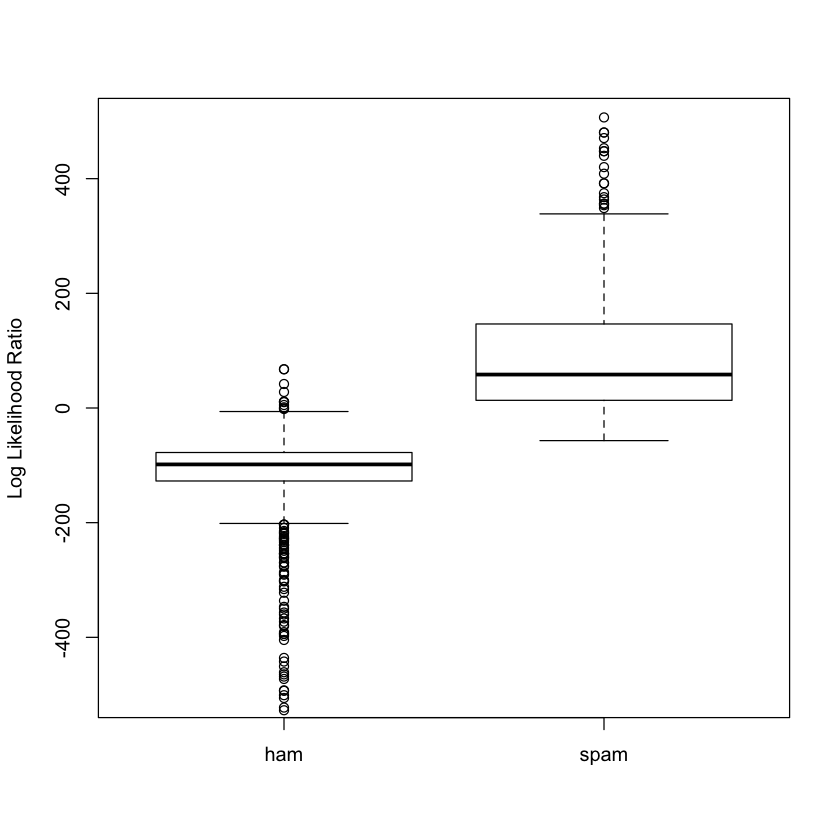

In [285]:
#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
#dev.off()


In [286]:
typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

[1] 0.007194245

[1] 0.01151079

In [287]:
typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

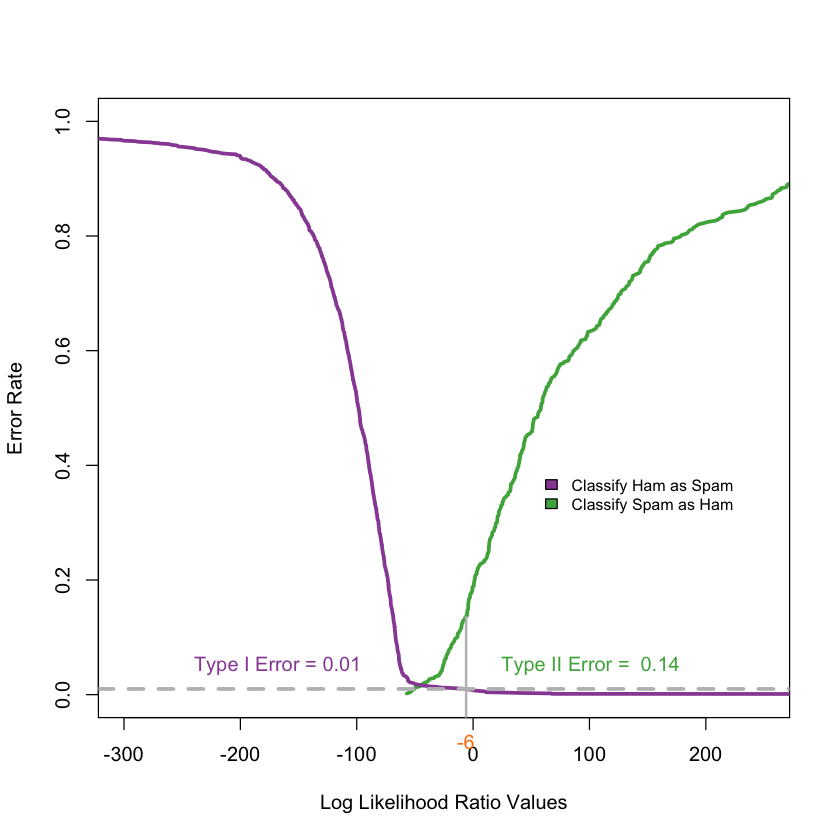

In [288]:
#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

#dev.off()

In [289]:
k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)

In [290]:
largeNum = 10000

print(sum(smallNums), digits = 20)

print(largeNum + sum(smallNums), digits = 20)

for (i in 1:length(smallNums)) {
  largeNum = largeNum + smallNums[i]
}
print(largeNum, digits = 20)

sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
header[1:12]

header[1] = sub("^From", "Top-From:", header[1])
header[1]

[1] 1.8189894035458564758e-06
[1] 10000.000001818989404
[1] 10000


[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                      
 [2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"                                          
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                       
 [4] "Received: from localhost (localhost [127.0.0.1])"                                                  
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                     
 [7] "Received: from phobos [127.0.0.1]"                                                                 
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                        
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                         
[10] "Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by"
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                            
[12] "    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100"

[1] "Top-From: exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"

In [291]:
headerPieces = read.dcf(textConnection(header), all = TRUE)

headerPieces[, "Delivered-To"]


headerVec = unlist(headerPieces)
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))
names(headerVec) = rep(colnames(headerPieces), dupKeys)

headerVec[ which(names(headerVec) == "Delivered-To") ]

length(headerVec)

length(unique(names(headerVec)))

processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}


[[1]]
[1] "zzzz@localhost.netnoteinc.com"              
[2] "exmh-workers@listman.spamassassin.taint.org"

Delivered-To 
              "zzzz@localhost.netnoteinc.com" 
                                 Delivered-To 
"exmh-workers@listman.spamassassin.taint.org"

[1] 36

[1] 26

In [292]:
headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes

hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

boundary = boundaries[9]
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

diff(c(bStringLocs[-1], eStringLoc))

[1] "text/plain; charset=us-ascii"                                                                                   
 [2] "text/plain; charset=US-ASCII"                                                                                   
 [3] "text/plain; charset=US-ASCII"                                                                                   
 [4] "text/plain; charset=\"us-ascii\""                                                                               
 [5] "text/plain; charset=US-ASCII"                                                                                   
 [6] "multipart/signed;\nboundary=\"==_Exmh_-1317289252P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""
 [7] NA                                                                                                               
 [8] "multipart/alternative;\nboundary=\"----=_NextPart_000_00C1_01C25017.F2F04E20\""                                 
 [9] "multipart/alternative; boundary=Apple-Mail-2-874629474"                                                         
[10] "multipart/signed;\nboundary=\"==_Exmh_-518574644P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[11] "multipart/related;\nboundary=\"------------090602010909000705010009\""                                          
[12] "multipart/signed;\nboundary=\"==_Exmh_-451422450P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[13] "multipart/signed;\nboundary=\"==_Exmh_267413022P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""  
[14] "multipart/mixed;\nboundary=\"----=_NextPart_000_0005_01C26412.7545C1D0\""                                       
[15] "multipart/alternative;\nboundary=\"------------080209060700030309080805\""

[1]  6  8  9 10 11 12 13 14 15

[1] "==_Exmh_-1317289252P"                     
[2] "----=_NextPart_000_00C1_01C25017.F2F04E20"
[3] "Apple-Mail-2-874629474"                   
[4] "==_Exmh_-518574644P"                      
[5] "------------090602010909000705010009"     
[6] "==_Exmh_-451422450P"                      
[7] "==_Exmh_267413022P"                       
[8] "----=_NextPart_000_0005_01C26412.7545C1D0"
[9] "------------080209060700030309080805"

[1]  2 35

[1] 77

[1] 42

In [293]:
### This code has mistakes in it - and we fix them later!
processAttach = function(body, contentType){
  
  boundary = getBoundary(contentType)
  
  bString = paste("--", boundary, "$", sep = "")
  bStringLocs = grep(bString, body)
  
  eString = paste("--", boundary, "--$", sep = "")
  eStringLoc = grep(eString, body)
  
  n = length(body)
  
  if (length(eStringLoc) == 0) eStringLoc = n + 1
  if (length(bStringLocs) == 1) attachLocs = NULL
  else attachLocs = c(bStringLocs[-1],  eStringLoc)
  
  msg = body[ (bStringLocs[1] + 1) : min(n, (bStringLocs[2] - 1), 
                                         na.rm = TRUE)]
  
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      contentTypeLoc = grep("[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      contentType = body[ begL + contentTypeLoc]
      contentType = gsub('"', "", contentType )
      MIMEType = sub(" *Content-Type: *([^;]*);?.*", "\\1", contentType)
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachInfo = NULL) )
  else return(list(body = msg, 
                   attachDF = data.frame(aLen = attachLens, 
                                         aType = attachTypes,
                                         stringsAsFactors = FALSE)))                                
}


In [294]:
bodyList = lapply(sampleSplit, function(msg) msg$body)
attList = mapply(processAttach, bodyList[hasAttach], 
                 contentTypes[hasAttach], 
                 SIMPLIFY = FALSE)

lens = sapply(attList, function(processedA) 
                           processedA$attachDF$aLen)
head(lens)  # will cause an error with the first message. its ok.
attList[[2]]$attachDF

body = bodyList[hasAttach][[2]]
length(body)

body[35:45]

Warning message in grep(bString, body):
“input string 41 is invalid in this locale”Warning message in grep(bString, body):
“input string 43 is invalid in this locale”Warning message in grep(bString, body):
“input string 51 is invalid in this locale”Warning message in grep(eString, body):
“input string 41 is invalid in this locale”Warning message in grep(eString, body):
“input string 43 is invalid in this locale”Warning message in grep(eString, body):
“input string 51 is invalid in this locale”

$`./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 12

$`./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 44 44

$`./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 83

$`./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 12

$`./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
NULL

$`./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 12

aLen,aType
44,text/html
44,<META http-equiv=3DContent-Type content=3Dtext/html; =


[1] 86

[1] ""                                                                
 [2] "------=_NextPart_000_00C1_01C25017.F2F04E20"                     
 [3] "Content-Type: text/html;"                                        
 [4] "\tcharset=\"Windows-1252\""                                      
 [5] "Content-Transfer-Encoding: quoted-printable"                     
 [6] ""                                                                
 [7] "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0 Transitional//EN\">"
 [8] "<HTML><HEAD>"                                                    
 [9] "<META http-equiv=3DContent-Type content=3D\"text/html; ="        
[10] "charset=3Dwindows-1252\">"                                       
[11] "<META content=3D\"MSHTML 6.00.2716.2200\" name=3DGENERATOR>"

In [295]:
processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}



In [296]:
processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)

  # replace body listings with atachments with body from
  # process attach considering last lines  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
  
  # create a placeholder vector to store each df of attachments for
  # every email - if no attachment, index pos == NULL
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure -- as a list of lists
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [297]:
# this results in a k:v pair for the header (processHeader)
# a list of lines of the body (splitMessage)
# a df of attachment types and attachment length (processAttach)
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)

sampleStruct = emailStruct[ indx ]

save(emailStruct, file="emailXX.rda")

header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

testSubject = c("DEAR MADAME", "WINNER!", "")

els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


Warning message in FUN(X[[i]], ...):
“incomplete final line found on './spam/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on './spam/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on './spam/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'”

[1] FALSE

[1] FALSE FALSE  TRUE

[1] "DEARMADAME" "WINNER"     ""

[1] "DEARMADAME" "WINNER"     ""

In [298]:
isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}


In [299]:
sapply(sampleStruct, perCaps)

funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                   4.451039                    7.491289 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                   7.436096                    5.090909 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                   6.116643                    7.732865 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                   5.523256                   10.059172 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                  10.885806                    6.472492 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                   9.597258                   11.970075 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                   9.233792                    1.655629 
./spam/messages/easy_ham971 
                   6.417910

In [300]:
lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

# placeholder DF to capture variables
# created by funcList below
createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e)) #  # if expression, evaluate it
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)

$isRe
  ./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                       TRUE                       FALSE 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                      FALSE                       FALSE 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                       TRUE                        TRUE 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                       TRUE                       FALSE 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                       TRUE                        TRUE 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                       TRUE                        TRUE 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                       TRUE                       FALSE 
./spam/messages/easy_ham971 
                       TRUE 

$numLines
  ./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                         50                          26 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                         38                          32 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                         31                          54 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                         35                          36 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                         65                          58 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                         70                          31 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                         38                          28 
./spam/messages/easy_ham971 
                         34 

$isYelling
  ./spam/messages/easy_ham1.Subject   ./spam/messages/easy_ham2.Subject 
                              FALSE                               FALSE 
  ./spam/messages/easy_ham3.Subject   ./spam/messages/easy_ham4.Subject 
                              FALSE                               FALSE 
  ./spam/messages/easy_ham5.Subject  ./spam/messages/easy_ham15.Subject 
                              FALSE                               FALSE 
 ./spam/messages/easy_ham27.Subject  ./spam/messages/easy_ham68.Subject 
                              FALSE                               FALSE 
 ./spam/messages/easy_ham69.Subject ./spam/messages/easy_ham329.Subject 
                              FALSE                               FALSE 
./spam/messages/easy_ham404.Subject ./spam/messages/easy_ham427.Subject 
                              FALSE                               FALSE 
./spam/messages/easy_ham516.Subject ./spam/messages/easy_ham852.Subject 
                              FALSE                               FALSE 
./spam/messages/easy_ham971.Subject 
                              FALSE 

$perCaps
  ./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                   4.451039                    7.491289 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                   7.436096                    5.090909 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                   6.116643                    7.732865 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                   5.523256                   10.059172 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                  10.885806                    6.472492 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                   9.597258                   11.970075 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                   9.233792                    1.655629 
./spam/messages/easy_ham971 
                   6.417910

,isRe,numLines,isYelling,perCaps
./spam/messages/easy_ham1,TRUE,50,FALSE,4.451039
./spam/messages/easy_ham2,FALSE,26,FALSE,7.491289
./spam/messages/easy_ham3,FALSE,38,FALSE,7.436096
./spam/messages/easy_ham4,FALSE,32,FALSE,5.090909
./spam/messages/easy_ham5,TRUE,31,FALSE,6.116643
./spam/messages/easy_ham15,TRUE,54,FALSE,7.732865


In [301]:
# R make file to create analysis variables for email spam detection

# create a list of functions and apply list of functions to email structure
# make a DF of variables where column is one function
# and rows are emails, features are created via functions below

funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines = # how many lines in message
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore = # email reply to contain _?
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = # exclamation count. VIAGRA!!
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt = # question mark counts
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = # number of attachments
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority = # priority of the msg
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec = # number of recipients
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps = # percentage caps in body
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo = # header in reply to?
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  # how much punctuation in subject?
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  # get hour of email
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  # multipart
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  # contains image?
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  # pretty good protection signed?
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  # percentage HTML chars
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  # contains known spam words in subject?
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  # of blanks in subject
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  # missing host on email
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  # email end in #?
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  # subject is caps
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  # fwd pct of message
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  # is this the original msg?
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  # contains Dear in message?
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  # electronically scribed?
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  # average word length
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  # number delivered
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)



In [302]:

# establish a list of spam words
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")

# get all of the recipients in to, cc, bcc
getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

# create feature rich df
emailDF = createDerivedDF(emailStruct)
dim(emailDF)
#save(emailDF, file = "spamAssassinDerivedDF.rda")

[1] 9348   30

In [303]:
#load("Data/spamAssassinDerivedDF.rda")
dim(emailDF)

perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}


[1] 9348   30

In [304]:
pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

indNA = which(is.na(emailDF$subExcCt))

indNoSubject = which(sapply(emailStruct, 
                            function(msg) 
                              !("Subject" %in% names(msg$header))))

all(indNA == indNoSubject)

all(emailDF$bodyCharCt > emailDF$numLines)


x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt

[1] TRUE

Warning message in indNA == indNoSubject:
“longer object length is not a multiple of shorter object length”

[1] FALSE

[1] TRUE

null device 
          1

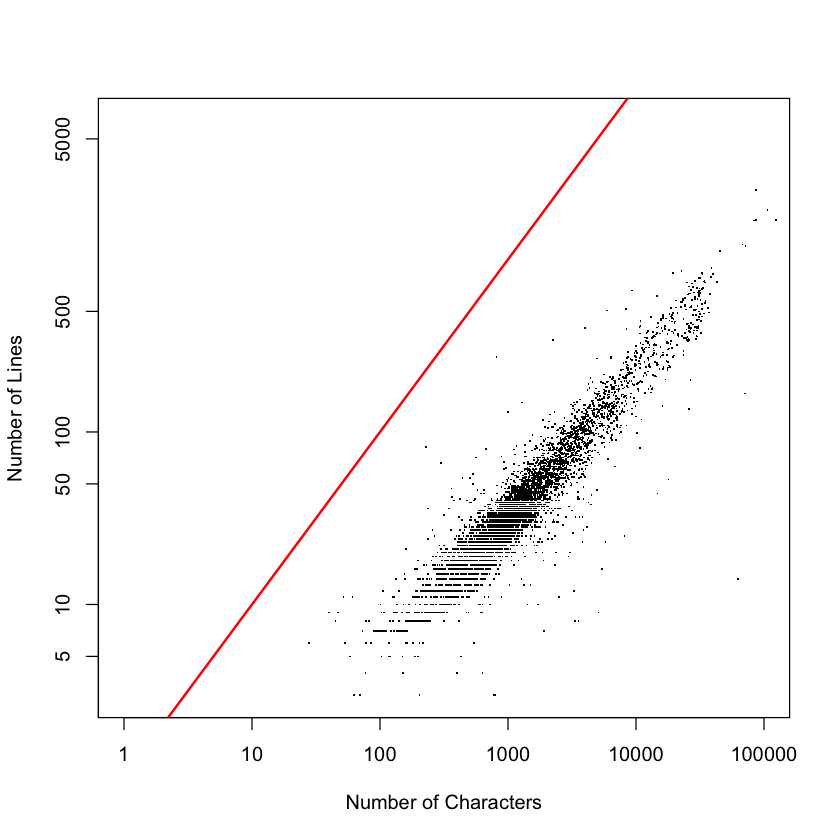

In [305]:
#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()

#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

#dev.off()

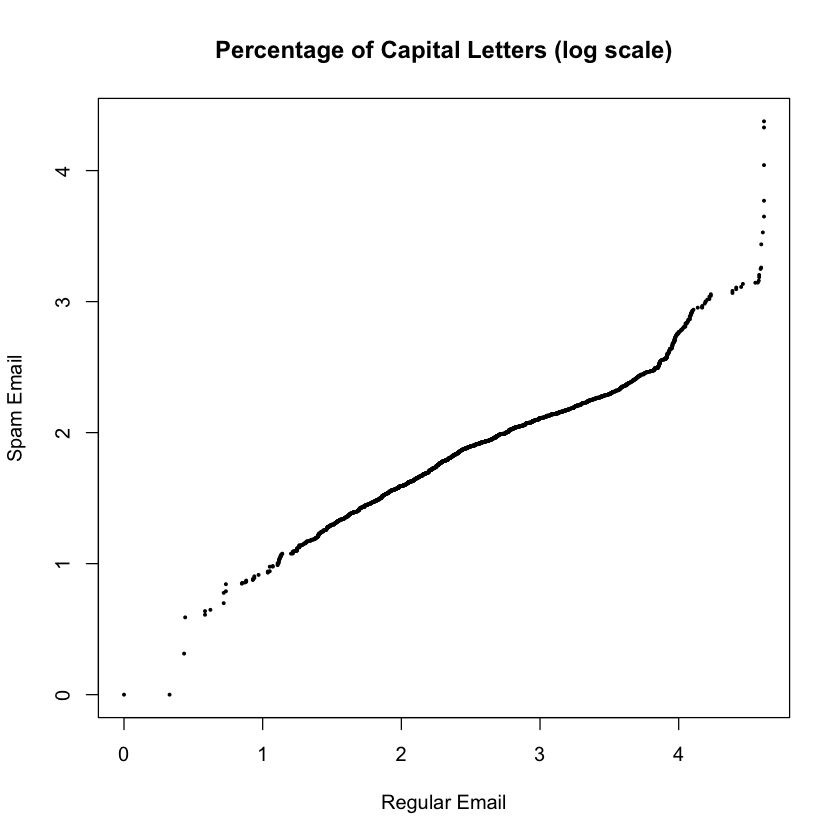

In [306]:
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

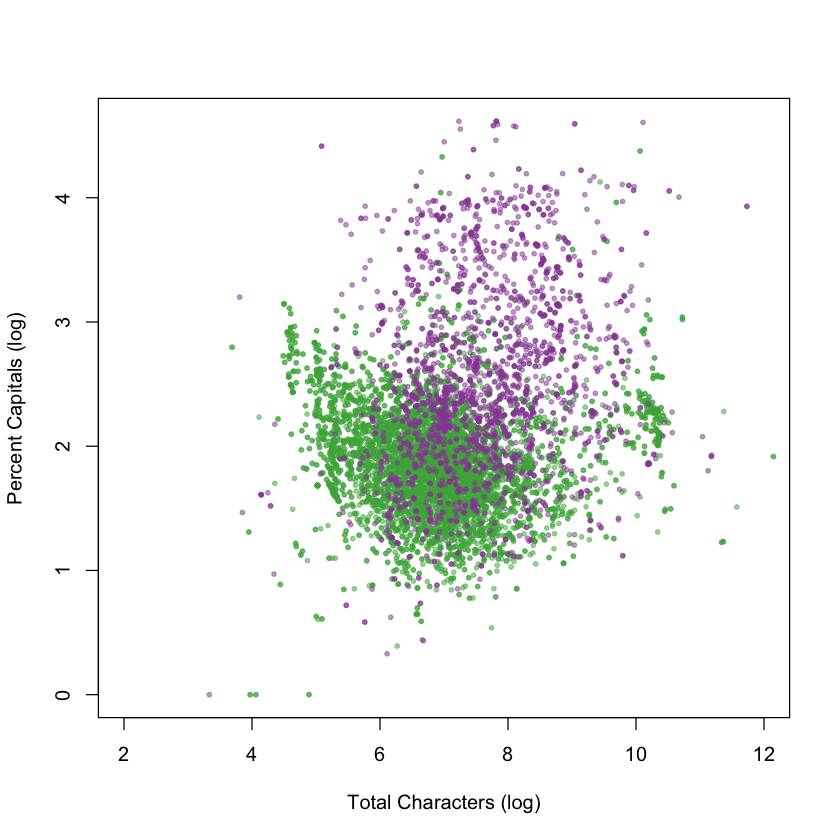

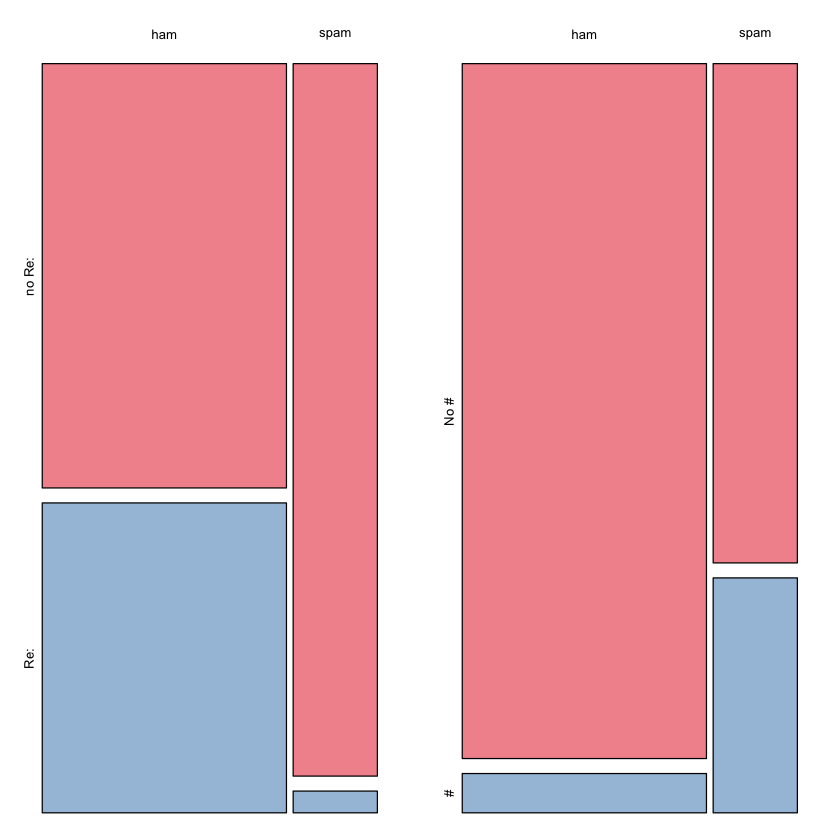

In [307]:
#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

#dev.off()

table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

#dev.off()

library(rpart)

#Read in data files
#Apply the Functions to create the features

# transform nominals and ordinals to factors with this function
setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars]) # re-bind data frame with factors
}

emailDFrp = setupRpart(emailDF)

In [308]:
# do not execute if this block in the above is executed 

set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")


F    T 
2192  125

[1] 0.05394907

[1] 0.1564456

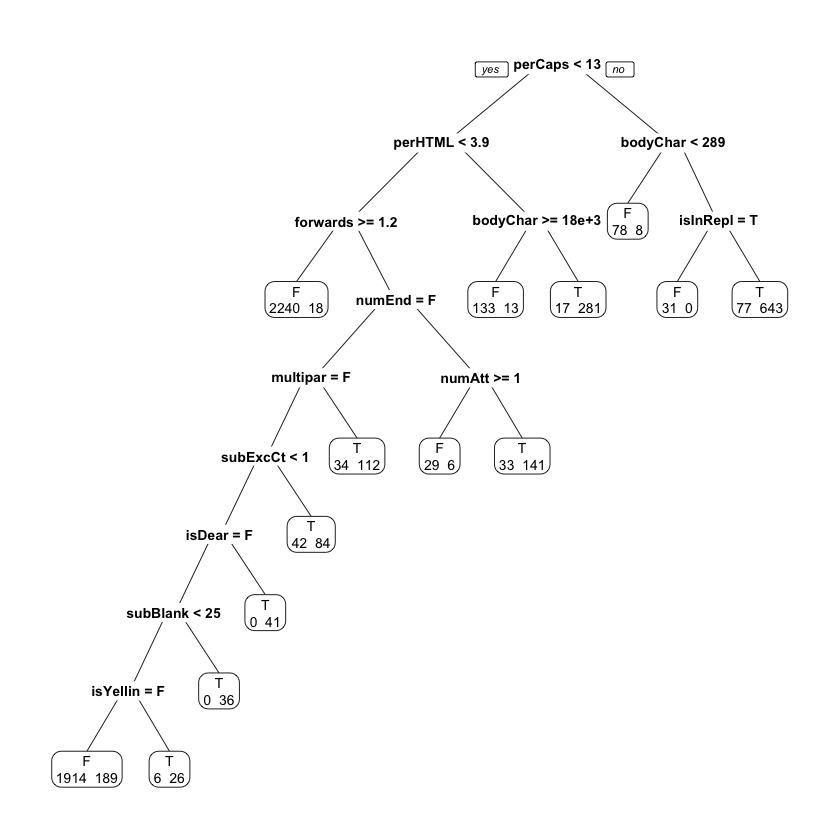

In [309]:
library(rpart.plot)
prp(rpartFit, extra = 1)

library(rpart.plot)
#pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

prp(rpartFit, extra = 1)
#dev.off()

predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

In [221]:
fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })


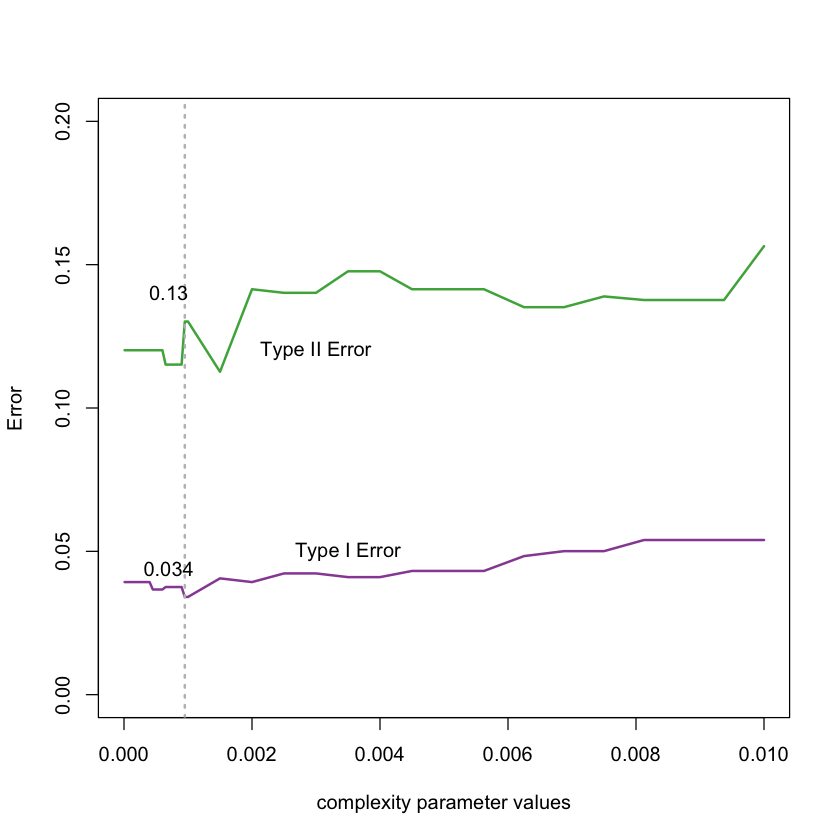

In [222]:

#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

#dev.off()

In [223]:
save(emailDFrp,file="data.Rda")

In [224]:
library(caret)

## Ok so first of all our data is in T/F 'factors'.  
We need to change it to numbers.  And as it turns out, there are quite a few NANs as well.  Let's set those to zero because imputation was 9 weeks ago

In [54]:
setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

## I think i may skip this and see if I can get the folds to work internally to caret
However, one way to define your folds is to set a seed, and have your folds in a list that you can pass on to others to get the same splits.

In [55]:

cv_folds <- createFolds(emailDFnum$isSpam, k=5, list=TRUE, returnTrain = TRUE)
lengths(cv_folds)

Fold1 Fold2 Fold3 Fold4 Fold5 
 7478  7478  7479  7479  7478

## Finally Metric Stuff
Because our authors prefer Type I/II errors, but the cool kids know that precision/recall/F1 is where its at, while the default of caret is accuracy and kappa.  To get us all on the same page, I create a function that returns the metrics we want.  However, rather than re-invent the wheel, I just install a package.  I am not sure if it had Type I/II errors so those I made my self.  \#MLSwag

<a href="#top">Back to top</a>

In [56]:
# library(MLmetrics)
# f1 <- function(data, lev = NULL, model = NULL) {
#   f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
#   p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
#   r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
#   fp <-sum(data$pred==0 & data$obs==1)/length(data$pred)  
 
#   fn <-sum(data$pred==1 & data$obs==0)/length(data$pred)
#     c(F1 = f1_val,
#     prec = p,
#     rec = r,
#     Type_I_err=fp,
#     Type_II_err=fn
#    )
# }


library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
  f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  fp <-sum(data$pred==1 & data$obs==0)
  fn <-sum(data$pred==0 & data$obs==1)
  tn <-sum(data$pred==0 & data$obs==0)
  tp <-sum(data$pred==1 & data$obs==1)
t1e<-fp/(fp+tn)
t2e<-fn/(fn+tp)
    c(F1 = f1_val,
    prec = p,
    rec = r,
    Type_I_err=t1e,
    Type_II_err=t2e
   )
}


Attaching package: ‘MLmetrics’

The following objects are masked from ‘package:caret’:

    MAE, RMSE

The following object is masked from ‘package:base’:

    Recall



ok so lets get the naive bayes packages installed. (first 2 lines)
The next line makes a dataframe of all the parameters to check.  
If you don't know what they are, look them up
https://topepo.github.io/caret/available-models.html

Then we create a trainControl object.  It tells caret how to train--using a cross-validation ('cv') with 3 folds in this case (number = 3).  We want the final predictions of the best model and our summary is the custom function from above.

Then we create our model: "model_nb".  We user the caret::train method.  We make 'isSpam' a factor because R is dumb and can't figure out that 1 and 0 are classes.  
*as.factor(isSpam) ~ .*  means Y=as.factor(isSpam), X=everything else.
    
*method* is the package we are using, and we pass our tuning grid.

In [57]:
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

library(naivebayes)
library(e1071)
nb_grid<-expand.grid(laplace=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb
# 0.0      FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.110056107 does the best

time = proc.time() - ptm
time


Attaching package: ‘e1071’

The following object is masked from ‘package:mlr’:

    impute

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Naive Bayes 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  laplace  usekernel  adjust  F1         prec       rec        Type_I_err 
  0.0      FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.110056107
  0.0      FALSE       TRUE   0.9120243  0.9379435  0.8899439  0.110056107
  0.0       TRUE      FALSE   0.8921660  0.8073299  0.9974104  0.002589555
  0.0       TRUE       TRUE   0.8921660  0.8073299  0.9974104  0.002589555
  0.1      FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.110056107
  0.1      FALSE       TRUE   0.9120243  0.9379435  0.8899439  0.110056107
  0.1       TRUE      FALSE   0.8921660  0.8073299  0.9974104  0.002589555
  0.1       TRUE       TRUE   0.8921660  0.8073299  0.9974104  0.002589555
  0.3      FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.110056107
  0.3      FALSE       TRUE   0.912024

   user  system elapsed 
 12.150   0.303  12.771 

In [58]:
#Did the boss fool us with the folds?  Nope.
table(model_nb$pred['Resample']) # 3 splits 



Fold1 Fold2 Fold3 
 3116  3116  3116 

In [59]:
# 5 folds is the standard. 3 folds is ok. 10 folds is overkilled 
ptm <- proc.time() 

val<-seq(from = 0, to=0.01, by=0.0005)
library(rpart)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1) 
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

# 0.0010  0.9607852  0.9575735  0.9640339  0.03596605  0.1239022   does the best! and better than naivebayes

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7478, 7478, 7479, 7479 
Resampling results across tuning parameters:

  cp      F1         prec       rec        Type_I_err  Type_II_err
  0.0000  0.9577277  0.9556068  0.9598613  0.04013871  0.1293267  
  0.0005  0.9586535  0.9551824  0.9621631  0.03783686  0.1309960  
  0.0010  0.9607852  0.9575735  0.9640339  0.03596605  0.1239022  
  0.0015  0.9593061  0.9570400  0.9615882  0.03841178  0.1251531  
  0.0020  0.9579437  0.9589294  0.9569848  0.04301517  0.1188979  
  0.0025  0.9573013  0.9550609  0.9595744  0.04042555  0.1309986  
  0.0030  0.9568278  0.9541410  0.9595750  0.04042503  0.1339222  
  0.0035  0.9554217  0.9536163  0.9572728  0.04272719  0.1351748  
  0.0040  0.9541856  0.9541551  0.9542519  0.04574805  0.1330915  
  0.0045  0.9530868  0.9533892  0.9528134  0.04718659  0.1351766  
  0.0050  0.9514591  0.9524395  0.9505113  0.0

   user  system elapsed 
  5.220   0.227   5.584 

In [60]:
ptm <- proc.time() 

# random Forest takes longer. the square_root of (29) is the max of fold.
library(randomForest)
rf_grid<-expand.grid(mtry=seq(from =1, to = 25, by = 2))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf
# original result is mtry = 9
# best mtry is 7 or 9 

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Random Forest 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  mtry  F1         prec       rec        Type_I_err  Type_II_err
   1    0.9160175  0.8483809  0.9955402  0.00445979  0.51689612 
   3    0.9769873  0.9707439  0.9833118  0.01668825  0.08594076 
   5    0.9836760  0.9791920  0.9882031  0.01179686  0.06090947 
   7    0.9845062  0.9818328  0.9871961  0.01280391  0.05298290 
   9    0.9848735  0.9817106  0.9880593  0.01194073  0.05340008 
  11    0.9847313  0.9814273  0.9880593  0.01194073  0.05423446 
  13    0.9840073  0.9811261  0.9869084  0.01309164  0.05506884 
  15    0.9846521  0.9818384  0.9874838  0.01251618  0.05298290 
  17    0.9834283  0.9809717  0.9859013  0.01409869  0.05548602 
  19    0.9831537  0.9798539  0.9864768  0.01352323  0.05882353 
  21    0.9833648  0.9802736  0.9864768  0.01352323  0.05757196 
  23  

   user  system elapsed 
160.945   3.031 169.593 

In [61]:
ptm <- proc.time()

# we are goind to fit 100 trees, which are correlated trees (below tree is related to the top tree)
library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = c(3,5,7,9,11), eta = c(0.01,0.03,0.1), gamma=c(1,3,5,10), colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb

time <- proc.time() - ptm
time 



Attaching package: ‘xgboost’

The following object is masked from ‘package:dplyr’:

    slice

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

eXtreme Gradient Boosting 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  eta   max_depth  gamma  F1         prec       rec        Type_I_err
  0.01   3          1     0.9305021  0.8878951  0.9774133  0.02258668
  0.01   3          3     0.9303753  0.8876647  0.9774133  0.02258668
  0.01   3          5     0.9305664  0.8880129  0.9774133  0.02258668
  0.01   3         10     0.9305749  0.8879073  0.9775572  0.02244281
  0.01   5          1     0.9478130  0.9216426  0.9755431  0.02445691
  0.01   5          3     0.9484603  0.9219676  0.9765501  0.02344986
  0.01   5          5     0.9485059  0.9224399  0.9761185  0.02388146
  0.01   5         10     0.9483679  0.9221660  0.9761185  0.02388146
  0.01   7          1     0.9589916  0.9431439  0.9753992  0.02460078
  0.01   7          3     0.9585702  0.9427308  0.9749676  0.02503237
  0.

   user  system elapsed 
338.646   3.602 355.098 

In [62]:
library(ggplot2)

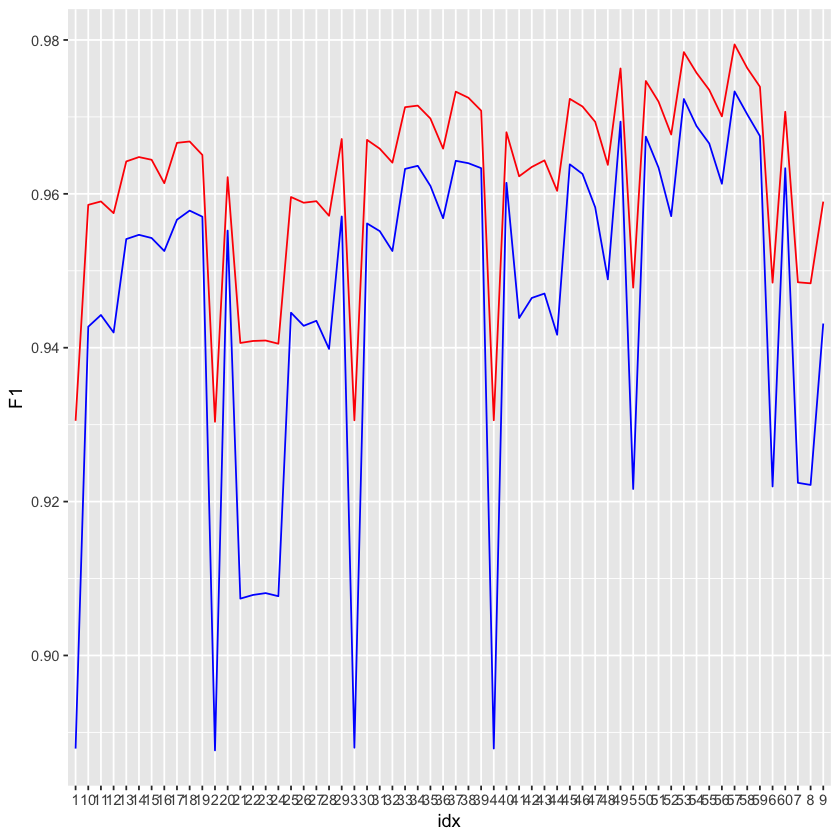

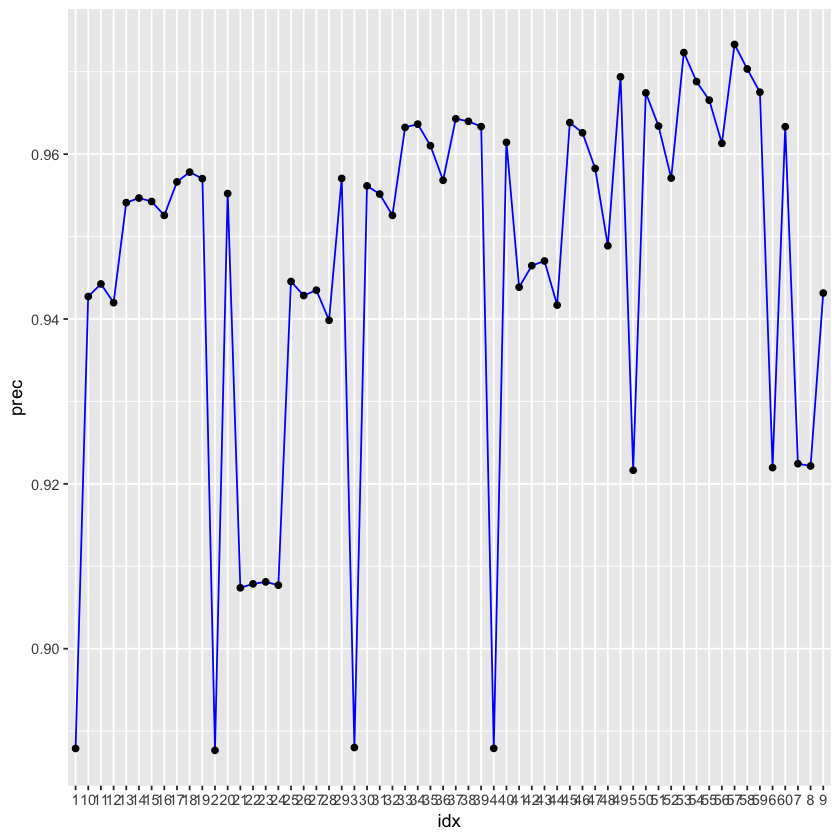

In [63]:
library(ggplot2)

model_xgb$results$idx<-row.names(model_xgb$results)
ggplot(model_xgb$results, aes(x=idx, y=F1,group=1)) + geom_line(color='red')+geom_line(color='blue',aes(x=idx,y=prec))
ggplot(model_xgb$results, aes(x=idx, y=prec,group=1)) + geom_line(color='blue')+geom_point()

In [64]:
model_xgb[4]


,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,F1,prec,rec,Type_I_err,Type_II_err,F1SD,precSD,recSD,Type_I_errSD,Type_II_errSD,idx
1,0.01,3,1,1,1,1,100,0.9305021,0.8878951,0.9774133,0.02258668,0.35794743,0.005157694,0.006951682,0.003239341,0.003239341,0.02387833,1
2,0.01,3,3,1,1,1,100,0.9303753,0.8876647,0.9774133,0.02258668,0.35878181,0.005307009,0.007184313,0.003239341,0.003239341,0.02469528,2
3,0.01,3,5,1,1,1,100,0.9305664,0.8880129,0.9774133,0.02258668,0.35753025,0.005266735,0.007155154,0.003239341,0.003239341,0.02459995,3
4,0.01,3,10,1,1,1,100,0.9305749,0.8879073,0.9775572,0.02244281,0.35794743,0.005447163,0.007010244,0.003687529,0.003687529,0.02387833,4
21,0.03,3,1,1,1,1,100,0.9406182,0.9073884,0.9764063,0.02359373,0.28911139,0.005832919,0.007734932,0.006936880,0.006936880,0.02628285,21
22,0.03,3,3,1,1,1,100,0.9408761,0.9078657,0.9764063,0.02359373,0.28744264,0.003822924,0.005737908,0.005795781,0.005795781,0.02011608,22
23,0.03,3,5,1,1,1,100,0.9409358,0.9081041,0.9762624,0.02373759,0.28660826,0.004792287,0.007007294,0.006042296,0.006042296,0.02417172,23
24,0.03,3,10,1,1,1,100,0.9405189,0.9077024,0.9758308,0.02416918,0.28785982,0.004252862,0.006569908,0.005980322,0.005980322,0.02294156,24
41,0.10,3,1,1,1,1,100,0.9622780,0.9438574,0.9814415,0.01855848,0.16937839,0.005737444,0.008018682,0.003425660,0.003425660,0.02504172,41
42,0.10,3,3,1,1,1,100,0.9634926,0.9464678,0.9811538,0.01884621,0.16103463,0.005582380,0.008354203,0.002637074,0.002637074,0.02602331,42


In [65]:
ptm <- proc.time() 

# linear kernel SVM caret library
library(kernlab)
svm_grid_lr<-expand.grid(cost=c(0.001, 0.01, 0.1, 1, 10, 100))
train_control_lr<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_svm_lr <-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control_lr, method='svmLinear2',tuneGrid = svm_grid_lr)
model_svm_lr

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Support Vector Machines with Linear Kernel 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  cost   F1         prec       rec        Type_I_err  Type_II_err
  1e-03  0.9326589  0.9020393  0.9654726  0.03452741  0.3041302  
  1e-02  0.9417962  0.9186337  0.9661919  0.03380809  0.2482270  
  1e-01  0.9430205  0.9214900  0.9656165  0.03438354  0.2386316  
  1e+00  0.9439135  0.9226712  0.9661919  0.03380809  0.2348769  
  1e+01  0.9447293  0.9239737  0.9664796  0.03352036  0.2307050  
  1e+02  0.9442661  0.9242615  0.9651849  0.03481513  0.2294535  

F1 was used to select the optimal model using the largest value.
The final value used for the model was cost = 10.

   user  system elapsed 
124.953   1.084 130.133 

In [66]:
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

# polynomial SVM caret library
# library(kernlab)
svm_grid_pl<-expand.grid(C=c(0.001, 0.01, 0.1, 1, 10, 100), scale = TRUE, degree=c(1,2,3))
train_control_pl<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_svm_pl <-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control_pl, method='svmPoly',tuneGrid = svm_grid_pl)
model_svm_pl

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Support Vector Machines with Polynomial Kernel 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  C      degree  F1         prec       rec        Type_I_err  Type_II_err
  1e-03  1       0.9325397  0.9008018  0.9666235  0.03337649  0.3087192  
  1e-03  2       0.9598333  0.9423550  0.9779888  0.02201122  0.1735503  
  1e-03  3       0.9676750  0.9538922  0.9818731  0.01812689  0.1376721  
  1e-02  1       0.9425881  0.9190874  0.9673428  0.03265717  0.2469754  
  1e-02  2       0.9649128  0.9549380  0.9751115  0.02488851  0.1335002  
  1e-02  3       0.9682364  0.9567537  0.9800029  0.01999712  0.1284940  
  1e-01  1       0.9446611  0.9239385  0.9663358  0.03366422  0.2307050  
  1e-01  2       0.9670257  0.9575546  0.9766940  0.02330600  0.1255736  
  1e-01  3       0.9702645  0.9600512  0.9807222  0.01927780  0.1184814  
  1e+00  1   

   user  system elapsed 
695.407   6.034 722.716 

In [67]:
## a way to time an R expression: system.time is preferred
ptm <- proc.time()

# Radial SVM caret library
# library(kernlab)
svm_grid_rl<-expand.grid(C=c(0.001, 0.01, 0.1, 1, 10, 100), sigma=c(.01,0.1,1, 10))
train_control_rl<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_svm_rl <-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control_rl, method='svmRadial',tuneGrid = svm_grid_rl)
model_svm_rl

time <- proc.time() - ptm
time 

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Support Vector Machines with Radial Basis Function Kernel 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  C      sigma  F1         prec       rec        Type_I_err    Type_II_err
  1e-03   0.01  0.8529358  0.7435815  1.0000000  0.0000000000  1.00000000 
  1e-03   0.10  0.8529358  0.7435815  1.0000000  0.0000000000  1.00000000 
  1e-03   1.00  0.8529358  0.7435815  1.0000000  0.0000000000  1.00000000 
  1e-03  10.00  0.8529358  0.7435815  1.0000000  0.0000000000  1.00000000 
  1e-02   0.01  0.9123286  0.8627842  0.9679183  0.0320817149  0.44639132 
  1e-02   0.10  0.8600473  0.7545467  0.9998561  0.0001438642  0.94326241 
  1e-02   1.00  0.8529358  0.7435815  1.0000000  0.0000000000  1.00000000 
  1e-02  10.00  0.8529358  0.7435815  1.0000000  0.0000000000  1.00000000 
  1e-01   0.01  0.9452531  0.9218004  0.9699324  0.0300676162  0.23

   user  system elapsed 
318.821  22.329 340.456 

<a href="#top">Back to top</a>